# Capture Traces for 27.12

In [1]:
%run "./Capture_traces_General.ipynb"

C:\Users\Samuel\AppData\Local\Temp\ipykernel_1608\4114886631.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


✔️ The File uploader succesfuly imported.
✔️ The Setuper class succesfuly imported.
✔️ The ANN_Observer class succesfuly imported.
✔️ The Analyser succesfuly runned.
✔️ The General functions/agregate succesfuly imported.


## Target [Basic Signed Char NO_OPT RAND] Measurement: 

  1. Measure target device in action
  2. Show dynamic SPA
  3. Calculate correlation matrixes (for 4 methods, that is HW8, HW32,  Abs8, Abs32) 

In [2]:
#firmwareName = 'basic_quantized3_MLP-Rand'
firmwareName = '2-akt-NO_OPT'
epochs_list = [1000]
decimate = 1
reverse = False

In [3]:
scope, target, cw_setuper = setup(f"makefile_dir_{firmwareName}")
time.sleep(10)

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_2-akt-NO_OPT/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 24059 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 24059 bytes
✔️ Setuper initiated.


Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1000 [00:00<?, ?it/s]

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 2b 2d cf 46 29 04 00 b4 78 d8 68 a7 00 ff 3f 2b f1 fc 00 d9 7a 96 09 2c 00 a5 57 74 64 c4 00 af 15 28 a4 e9 00 57 db 5e 20 fb 00 00 cd 00')


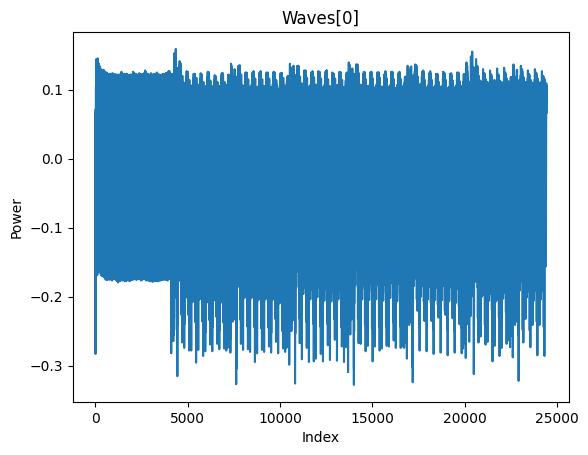

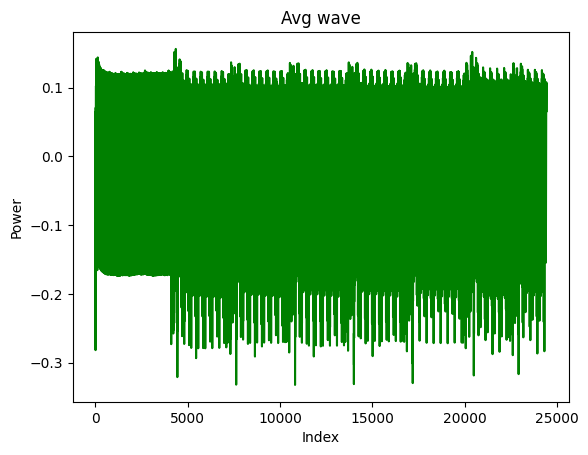

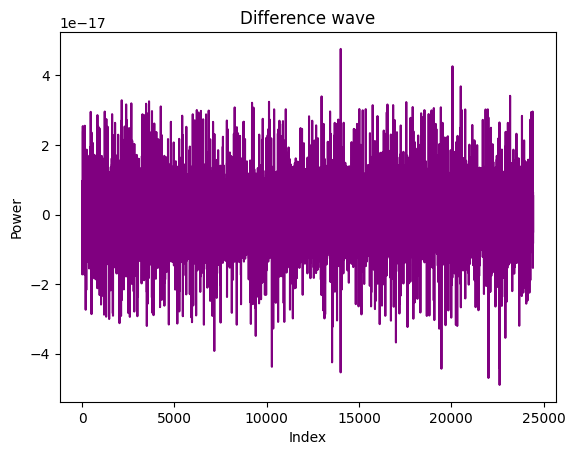

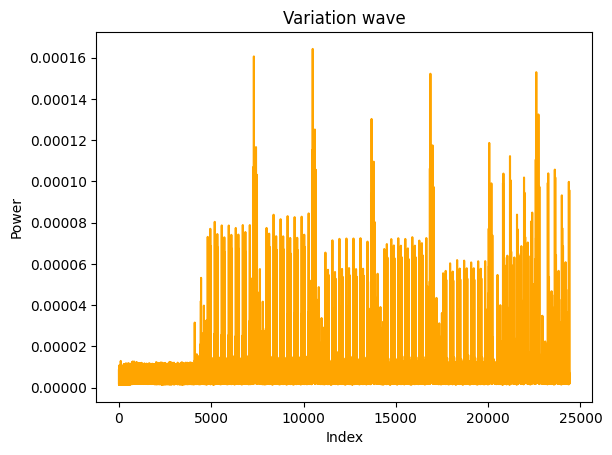

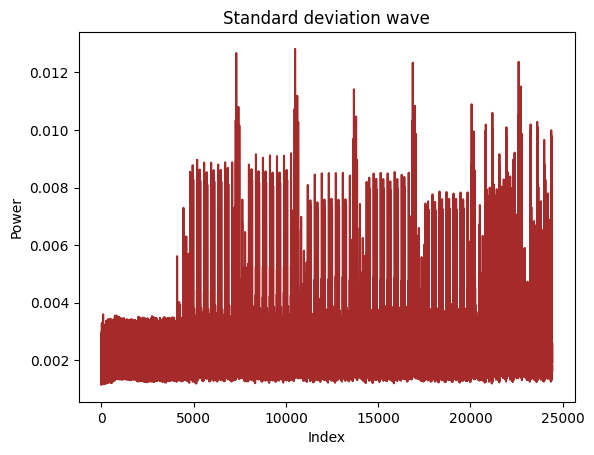

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

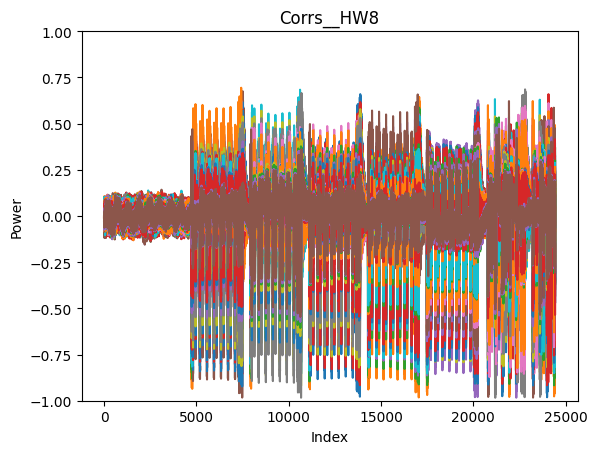

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

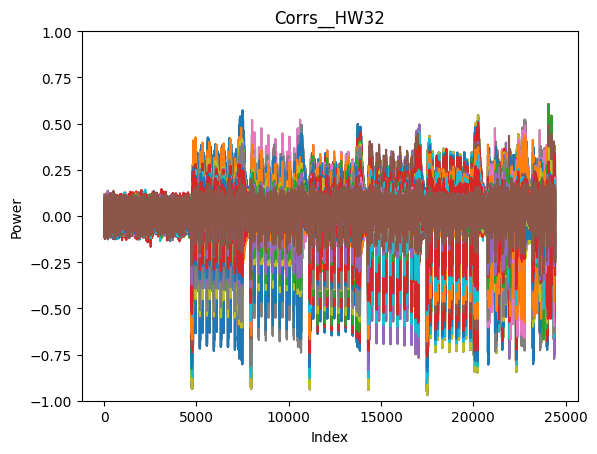

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

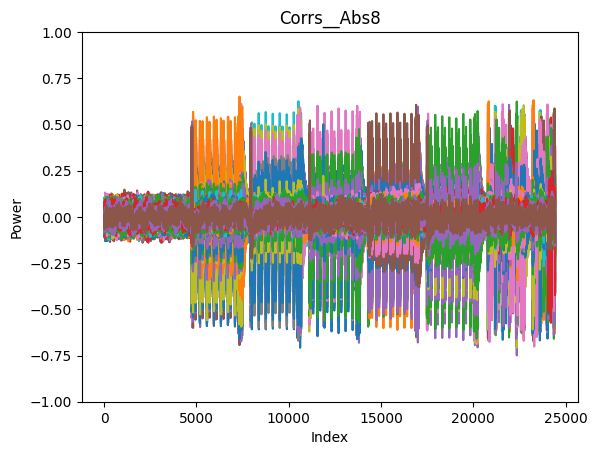

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

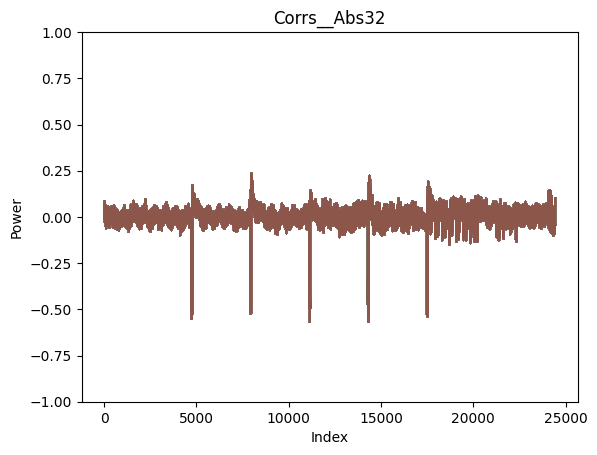

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [4]:
corr_HW8, corr_HW32, corr_Abs8, corr_Abs32, rand_inputs, waves, out, diff_avg, avg_wave, var = capture_correlate(scope=scope,
                                                                                                                      epochs_list = epochs_list,
                                                                                                                      decimate = decimate,
                                                                                                                      reverse = reverse,
                                                                                                                      runName=firmwareName)

### SPA

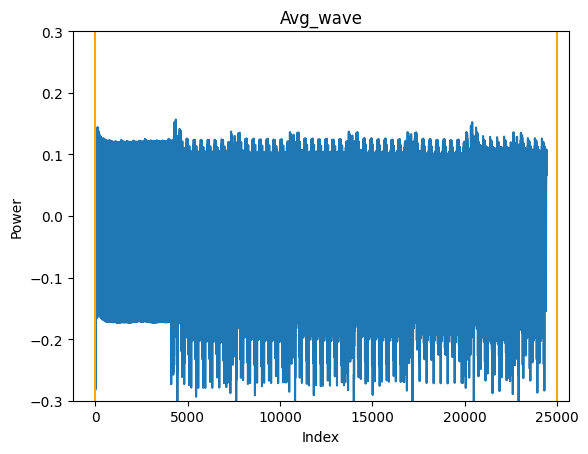

In [22]:
next_borders = [0, 25000]
avg_wave = np.array(avg_wave)
image = plot_mult(avg_wave, _type = f"avg_wave_{firmwareName}", mult=False, ylim=[-0.3,0.3], graph_title="Avg_wave", ylabel="Power", borders = next_borders)

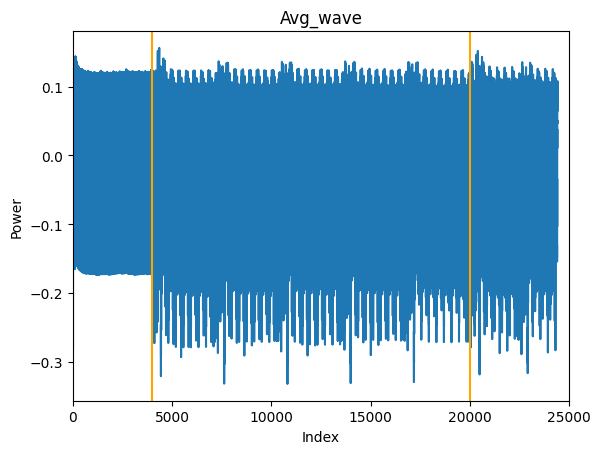

In [23]:
prev_borders = next_borders
next_borders = [4000, 20000]
avg_wave = np.array(avg_wave)
image = plot_mult(avg_wave, _type = "ANN_Active", mult=False, xlim=[prev_borders[0],prev_borders[1]], graph_title="Avg_wave",
                  ylabel="Power", borders = next_borders)

#### SPA of neuron's 1. layer

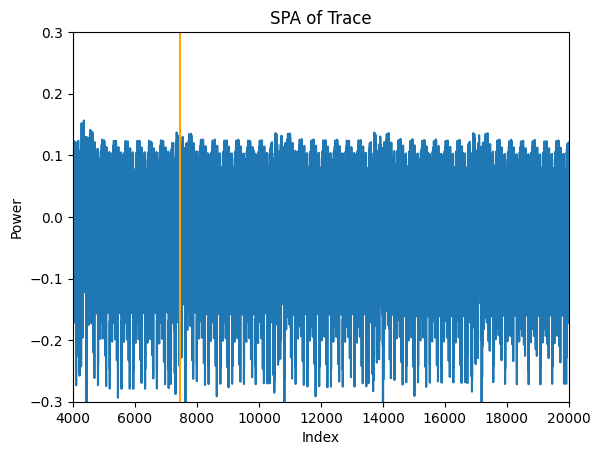

In [24]:
prev_borders = next_borders
next_borders = [4000, 7450]
avg_wave = np.array(avg_wave)
plot_mult(avg_wave, _type = "Layer1", mult=False, xlim=[prev_borders[0],prev_borders[1]], ylim=[-0.3,0.3], graph_title="SPA of Trace",
          ylabel="Power", borders = next_borders)
offset = next_borders[1] - next_borders[0]

##### SPA of neuron's 1. layer, 1. neuron

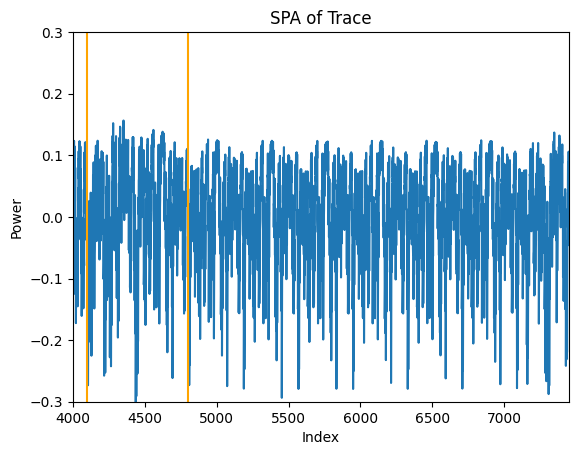

In [25]:
prev_borders = next_borders
next_borders = [4100, 4800]
avg_wave = np.array(avg_wave)
plot_mult(avg_wave, _type = "Layer1_Neuron_1th", mult=False, xlim=[prev_borders[0],prev_borders[1]], ylim=[-0.3,0.3], graph_title="SPA of Trace",
          ylabel="Power", borders = next_borders)

###### SPA of neuron's 1. layer, 1. neuron, 1. multiplication

In [36]:
corr_map.shape

(256, 24429)

- Showing 1*input correlations

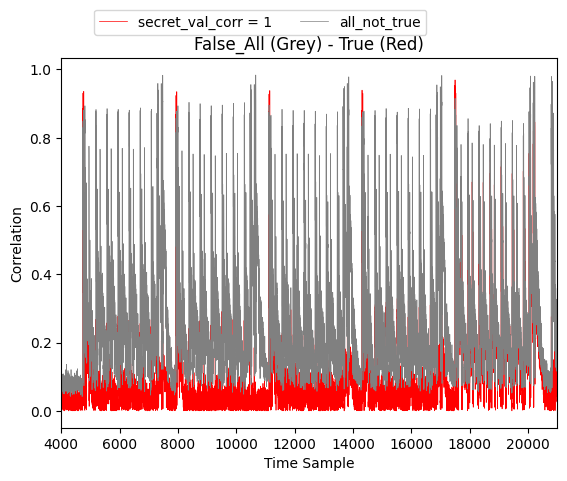

In [46]:
corr_map = abs(np.array(corr_HW8))
compTrueToAll_corrMatrix(corr_map, true_secret = 1, xlim=[4000, 21000], true_last = False, saveName = f'CPA_mult_level_secret[{i}]')

- Showing true secret value, without 1-correlation

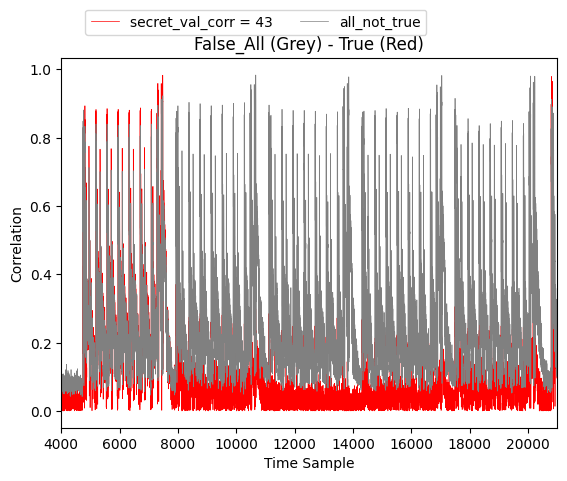

In [40]:
corr_map = abs(np.array(corr_HW8))
compTrueToAll_corrMatrix(corr_map[2:256,:], true_secret = 45-2, xlim=[4000, 21000], true_last = False, saveName = f'CPA_mult_level_secret[{i}]')

[ 45 207  70  41   4   0 180 120 216 104 167   0 255  63  43 241 252   0
 217 122 150   9  44   0 165  87 116 100 196   0 175  21  40 164 233   0
  87 219  94  32 251]
170


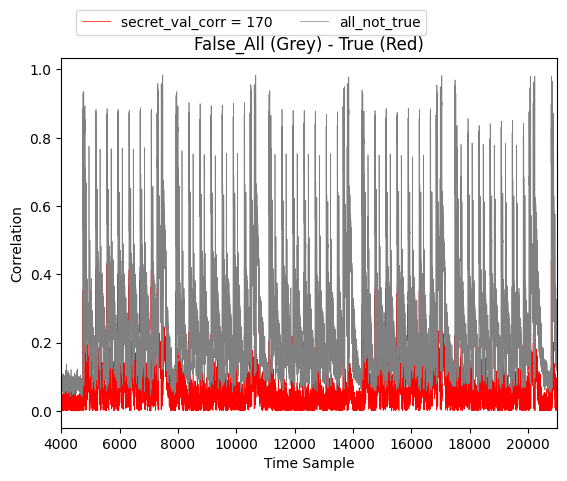

C:\Users\Samuel\AppData\Local\Temp\ipykernel_1608\2890189094.py:7: RuntimeWarning: overflow encountered in scalar add
  curr = np.uint32(i+125)%256


76


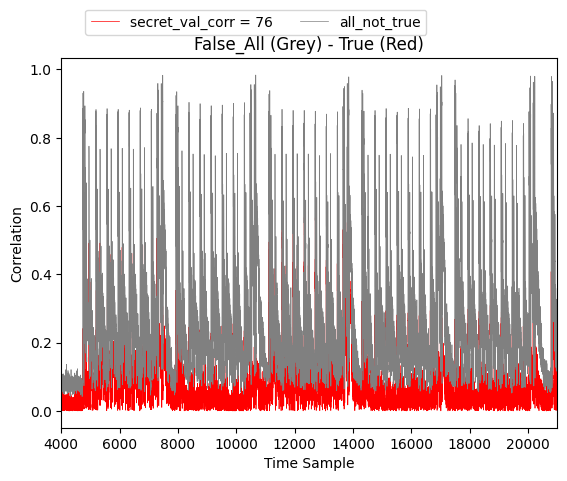

195


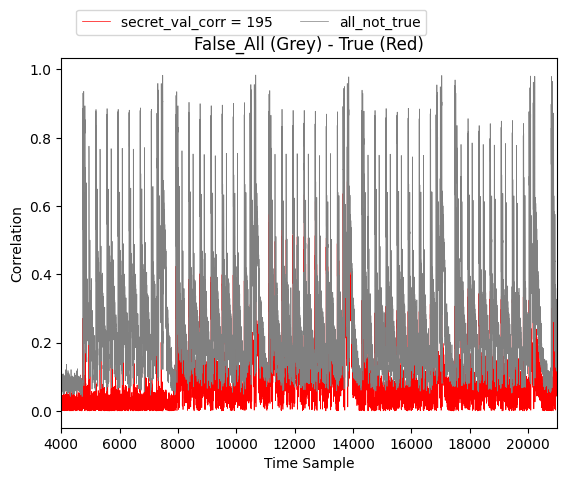

166


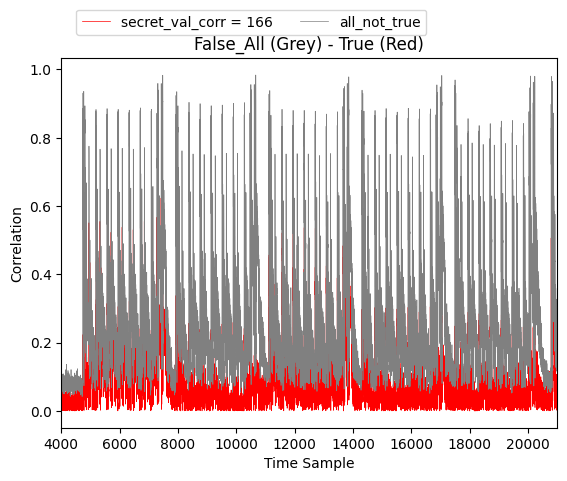

129


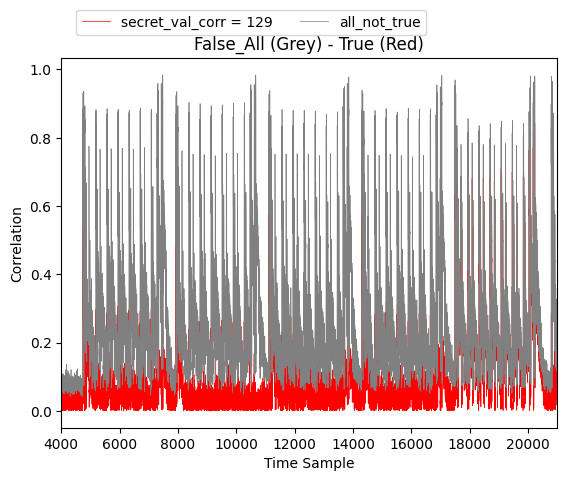

In [45]:
prev_borders = next_borders
secrets = np.array(out)[3:-4]
print(secrets)
corr_map = abs(np.array(corr_HW8))
akt_borders = np.array(prev_borders) + 0
for i in secrets[0:5]:
    curr = np.uint32(i+125)%256
    print(curr)
    compTrueToAll_corrMatrix(corr_map, true_secret = curr, xlim=[4000, 21000], true_last = False, saveName = f'CPA_mult_level_secret[{i}]')
    akt_borders = akt_borders + offset

### CPA

##### CPA, weight extraction - Abs8

Hello 45
Peak range: 0.3
24429
 Index of global max: 22351 and global_max_val: 0.7496716398926095


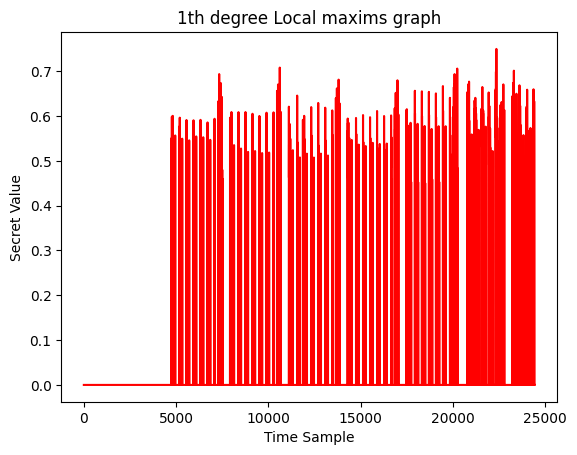

Number of uniques: 48
Number of local maxims: 1274
Uniquess: [4, 32, 1, 104, 160, 45, 90, 208, 180, 2, 16, 64, 128, 207, 224, 120, 60, 240, 158, 8, 24, 192, 48, 70, 96, 41, 72, 164, 144, 82, 216, 88, 176, 220, 84, 112, 184, 136, 226, 113, 196, 177, 98, 101, 232, 244, 12, 253]
Local maxims: [4, 4, 4, 32, 32, 32, 1, 1, 104, 104, 1, 1, 1, 1, 4, 4, 4, 160, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 104, 45, 45, 45, 45, 45, 160, 160, 160, 160, 160, 160, 160, 160, 160, 104, 104, 104, 45, 104, 104, 90, 45, 45, 45, 45, 160, 160, 160, 160, 160, 160, 160, 104, 104, 104, 104, 104, 45, 104, 45, 45, 45, 45, 160, 45, 45, 160, 160, 160, 160, 104, 160, 45, 104, 104, 45, 45, 90, 45, 45, 45, 45, 160, 160, 160, 160, 160, 160, 160, 160, 104, 160, 104, 45, 104, 90, 90, 104, 90, 45, 45, 45, 45, 160, 160, 160, 160, 45, 160, 160, 160, 160, 104, 160, 45, 160, 45, 104, 45, 104, 90, 45, 45, 45, 45, 160, 160, 160, 160, 45, 160, 160, 104, 104, 208, 45, 104, 104, 45, 90, 45, 180, 45, 104, 104, 104, 45, 45, 45, 160, 16

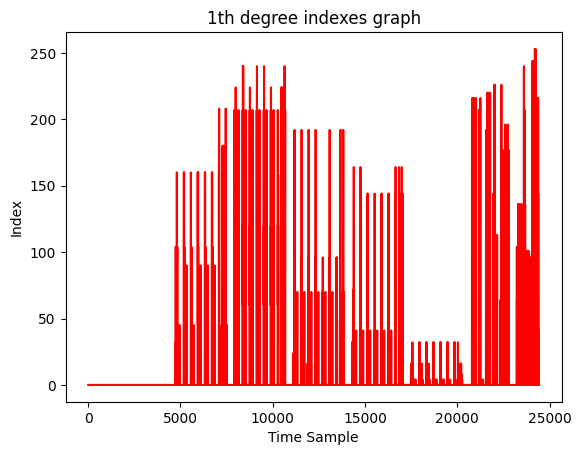

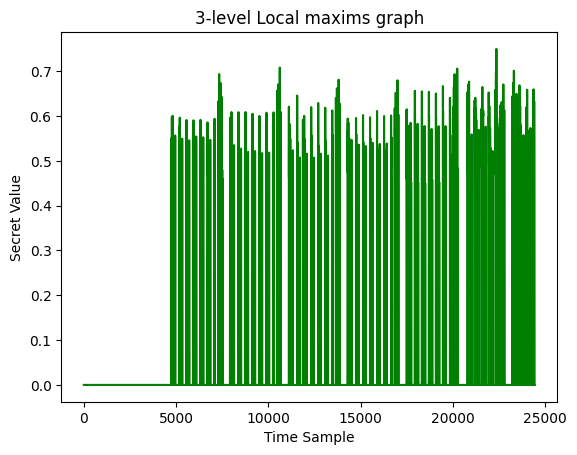

Number of uniques: 48
Number of local maxims: 1617
Uniquess: [4, 32, 1, 104, 160, 45, 90, 208, 180, 2, 16, 64, 128, 207, 224, 120, 60, 240, 158, 8, 24, 192, 96, 48, 70, 41, 72, 164, 144, 82, 216, 176, 88, 220, 84, 112, 184, 136, 226, 113, 196, 177, 98, 101, 232, 244, 12, 253]
Local maxims: [4, 4, 4, 32, 32, 32, 1, 1, 1, 104, 104, 1, 1, 1, 4, 1, 4, 4, 4, 4, 160, 160, 104, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 104, 45, 45, 45, 45, 45, 45, 45, 45, 160, 160, 160, 160, 160, 160, 160, 160, 104, 160, 104, 160, 104, 160, 104, 104, 104, 45, 104, 104, 90, 45, 45, 45, 45, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 104, 160, 104, 160, 104, 104, 104, 45, 104, 45, 45, 45, 45, 160, 45, 45, 45, 160, 160, 160, 160, 104, 160, 104, 160, 104, 45, 104, 104, 45, 45, 90, 45, 45, 45, 45, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 104, 160, 104, 45, 45, 104, 90, 90, 104, 90, 45, 45, 45, 45, 160, 160, 160, 160, 160, 45, 160, 160, 160, 160, 160, 104, 160, 104, 160, 45, 45, 160, 45, 1

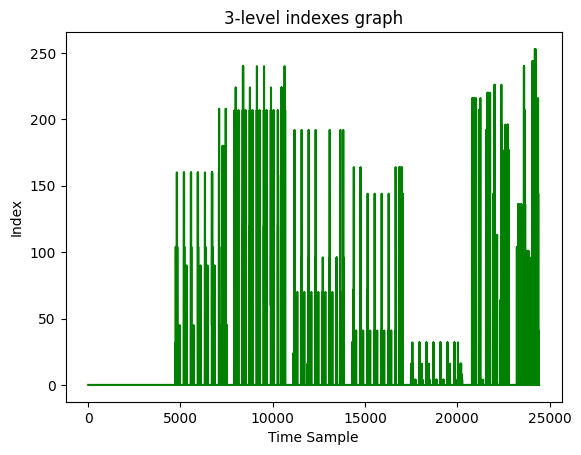

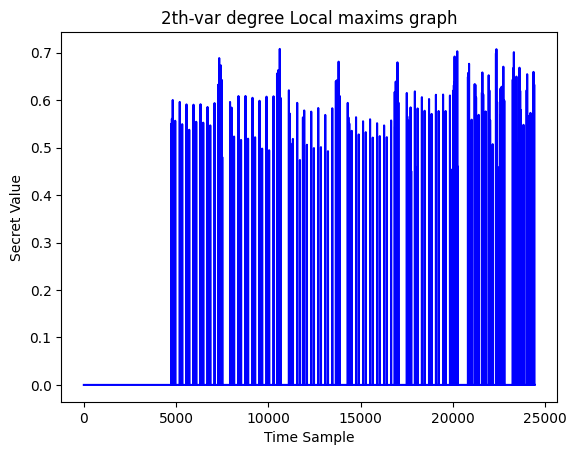

Number of uniques: 36
Number of local maxims: 169
Uniquess: [1, 4, 45, 104, 160, 180, 208, 16, 224, 120, 207, 60, 240, 8, 48, 70, 24, 32, 41, 164, 144, 2, 216, 220, 82, 184, 136, 113, 177, 196, 101, 96, 232, 244, 253, 72]
Local maxims: [1, 4, 45, 45, 104, 45, 160, 45, 45, 45, 160, 45, 160, 45, 160, 104, 180, 45, 45, 45, 104, 208, 45, 45, 16, 4, 224, 120, 207, 120, 207, 120, 207, 120, 207, 120, 207, 120, 207, 120, 60, 60, 60, 207, 60, 240, 207, 8, 4, 48, 70, 70, 70, 16, 70, 70, 70, 70, 70, 70, 70, 70, 70, 24, 24, 70, 70, 24, 48, 70, 32, 4, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 164, 32, 144, 41, 164, 144, 144, 16, 2, 16, 4, 4, 4, 4, 4, 4, 4, 4, 4, 32, 4, 4, 4, 4, 32, 4, 4, 4, 4, 32, 16, 4, 4, 8, 16, 4, 4, 45, 45, 216, 216, 120, 207, 16, 4, 70, 70, 220, 220, 82, 41, 184, 136, 113, 4, 4, 136, 177, 177, 196, 136, 177, 196, 136, 136, 45, 45, 136, 136, 136, 136, 240, 120, 207, 101, 101, 96, 70, 232, 244, 253, 253, 72, 41]


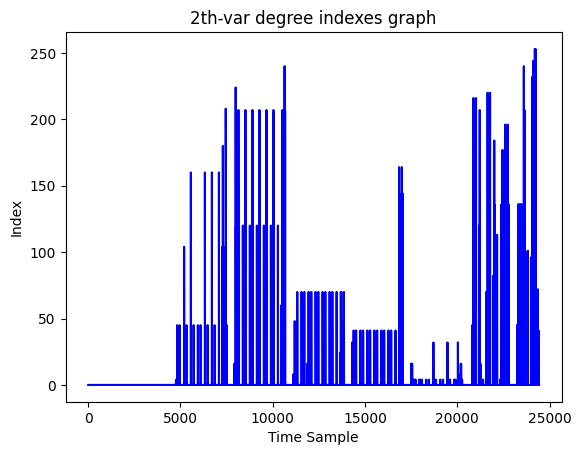

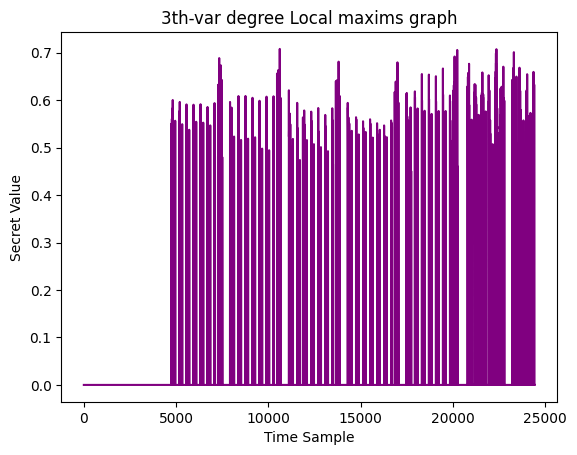

Number of uniques: 45
Number of local maxims: 871
Uniquess: [4, 32, 1, 104, 45, 160, 90, 208, 180, 16, 64, 128, 224, 120, 207, 60, 240, 8, 24, 2, 48, 70, 96, 192, 72, 41, 164, 144, 82, 216, 176, 220, 84, 184, 112, 136, 226, 113, 177, 196, 98, 101, 232, 244, 253]
Local maxims: [4, 4, 4, 32, 32, 1, 1, 104, 1, 1, 1, 1, 4, 4, 45, 45, 45, 45, 45, 45, 104, 45, 45, 45, 160, 160, 160, 160, 160, 104, 104, 104, 104, 45, 45, 45, 45, 160, 160, 160, 160, 104, 104, 104, 104, 45, 45, 45, 45, 45, 160, 160, 104, 160, 104, 104, 45, 45, 45, 45, 45, 160, 160, 160, 160, 104, 160, 104, 90, 104, 45, 45, 45, 45, 160, 160, 45, 160, 160, 104, 160, 45, 45, 104, 104, 45, 45, 45, 45, 160, 160, 160, 104, 104, 208, 45, 104, 45, 90, 45, 104, 104, 104, 45, 45, 160, 160, 180, 180, 180, 45, 45, 45, 45, 45, 180, 45, 45, 90, 104, 104, 104, 104, 180, 104, 160, 208, 45, 45, 45, 45, 45, 45, 45, 45, 4, 16, 16, 16, 64, 128, 4, 4, 4, 1, 4, 4, 224, 224, 224, 120, 120, 120, 120, 120, 120, 207, 207, 207, 60, 120, 120, 120, 240, 12

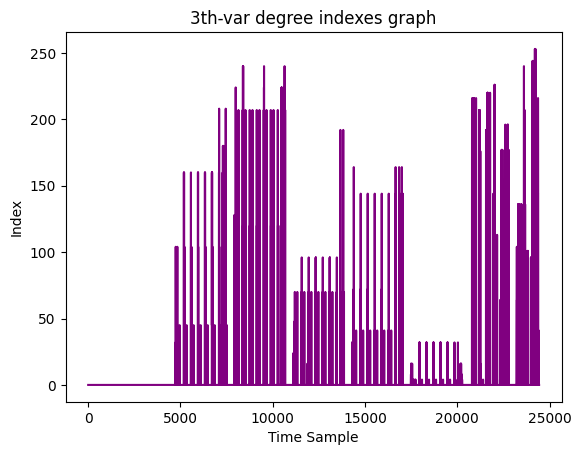

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4745, with correlation secret_corr = 0.550


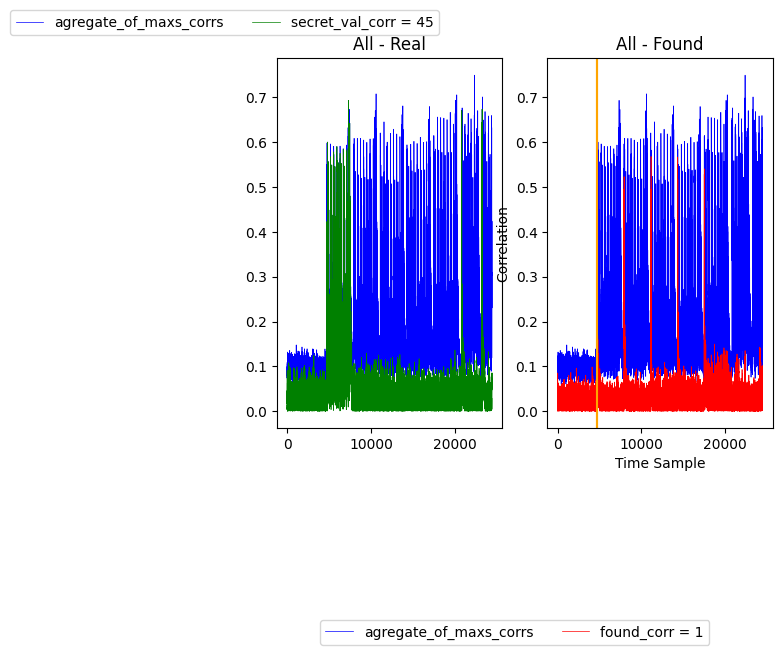

Hello 207
In range 4758 - 24429
 Found the soonest secret value is 4, at the time sample 4771, with correlation secret_corr = 0.561


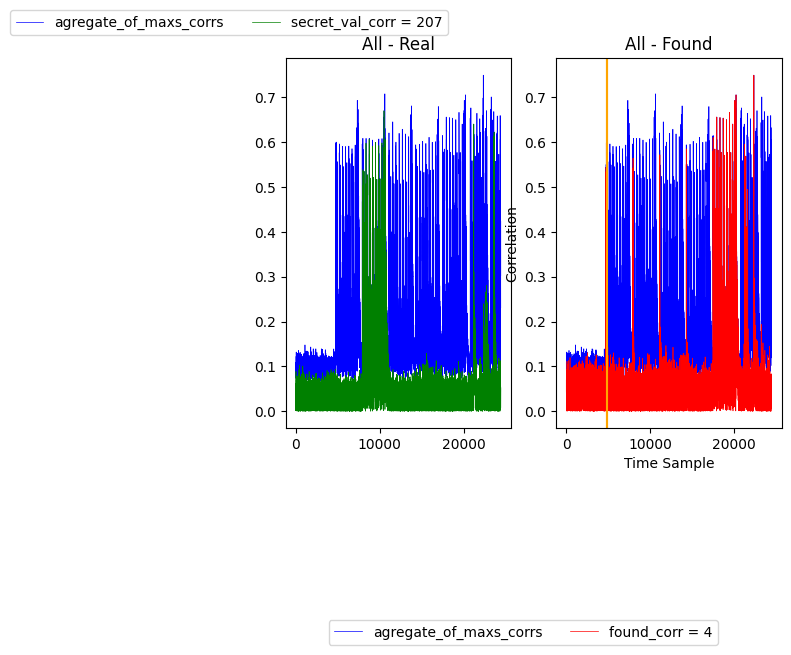

Hello 70
In range 4794 - 24429
 Found the soonest secret value is 45, at the time sample 4817, with correlation secret_corr = 0.600


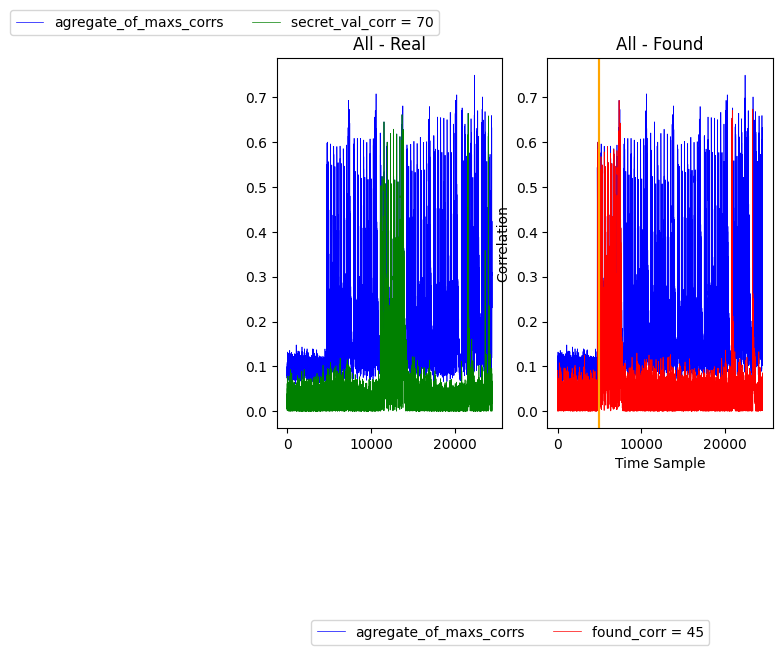

Hello 41
In range 4884 - 24429
 Found the soonest secret value is 45, at the time sample 4951, with correlation secret_corr = 0.557


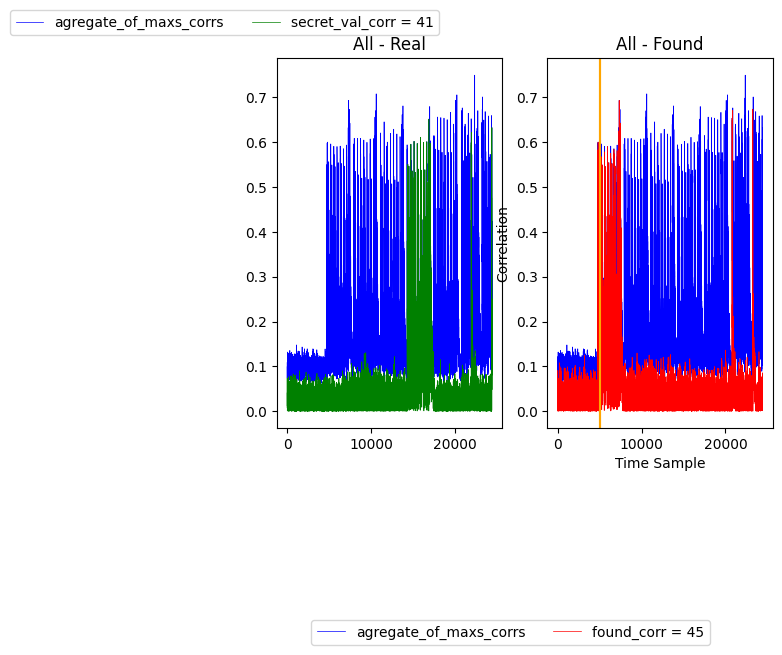

Hello 4
In range 5074 - 24429
 Found the soonest secret value is 104, at the time sample 5197, with correlation secret_corr = 0.596


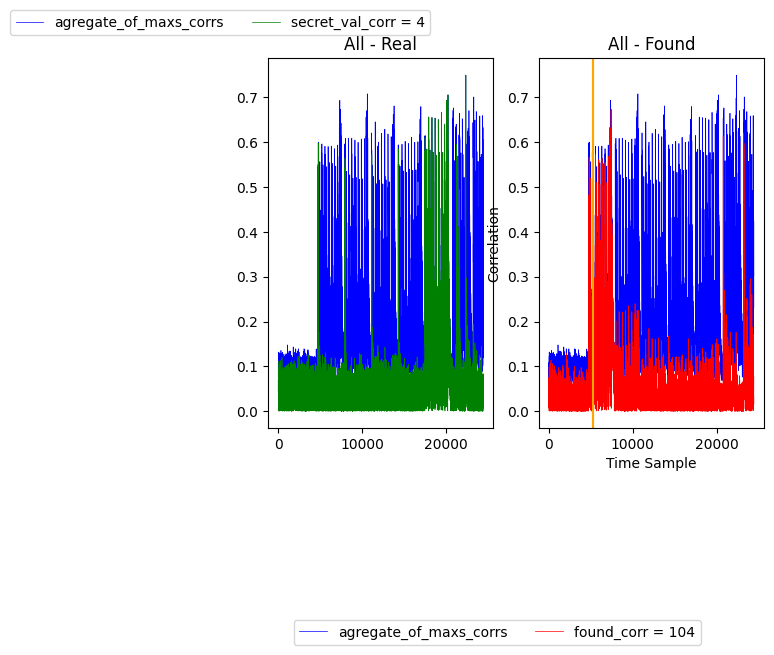

Hello 0
In range 5263 - 24429
 Found the soonest secret value is 45, at the time sample 5329, with correlation secret_corr = 0.549


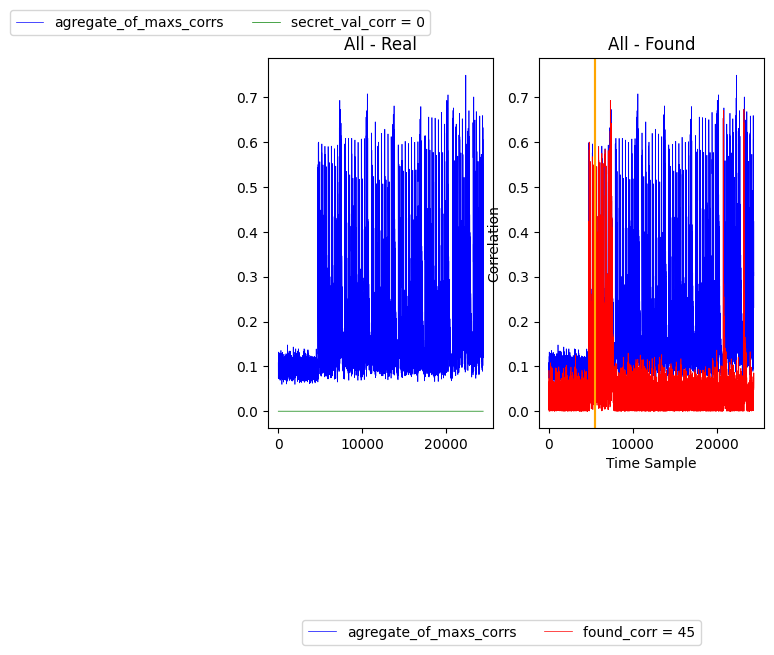

Hello 180
In range 5446 - 24429
 Found the soonest secret value is 160, at the time sample 5562, with correlation secret_corr = 0.591


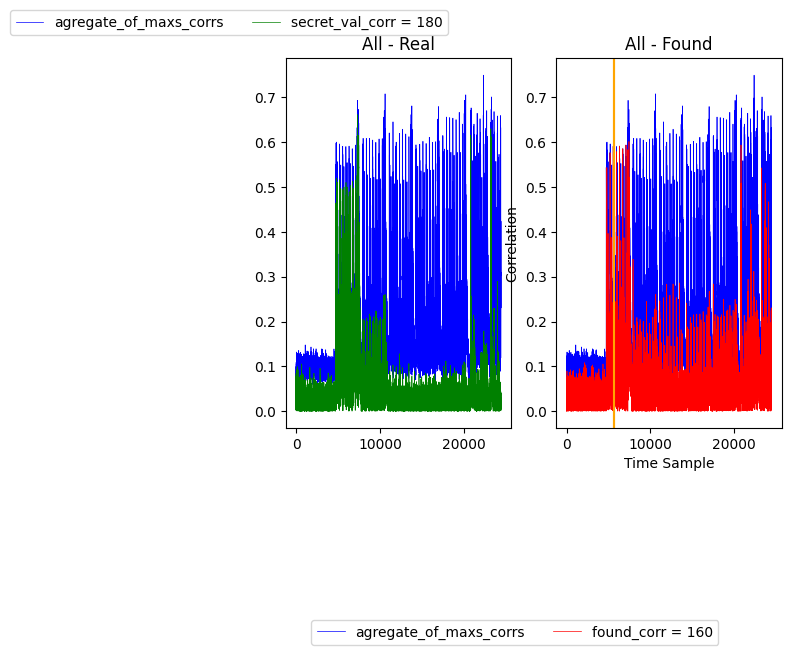

Hello 120
In range 5636 - 24429
 Found the soonest secret value is 45, at the time sample 5710, with correlation secret_corr = 0.538


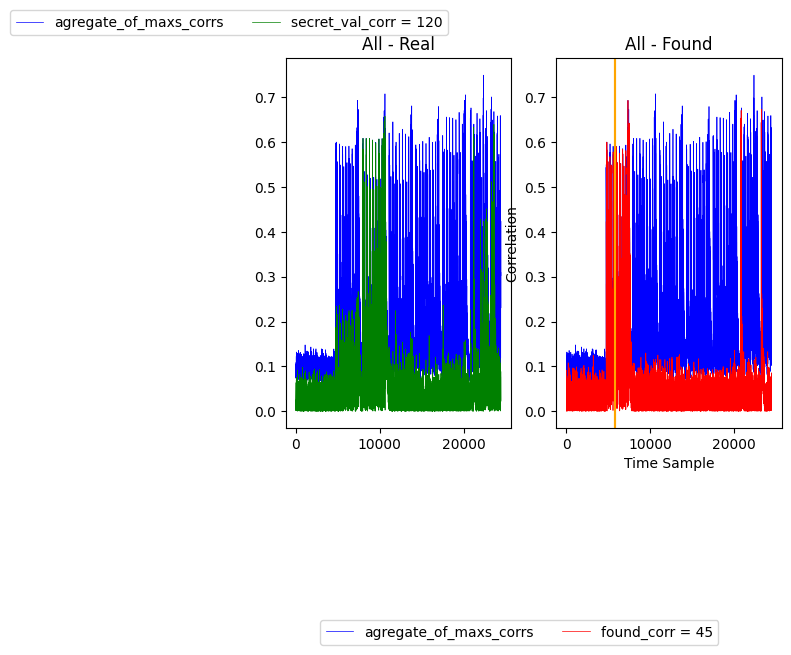

Hello 216
In range 5826 - 24429
 Found the soonest secret value is 45, at the time sample 5942, with correlation secret_corr = 0.590


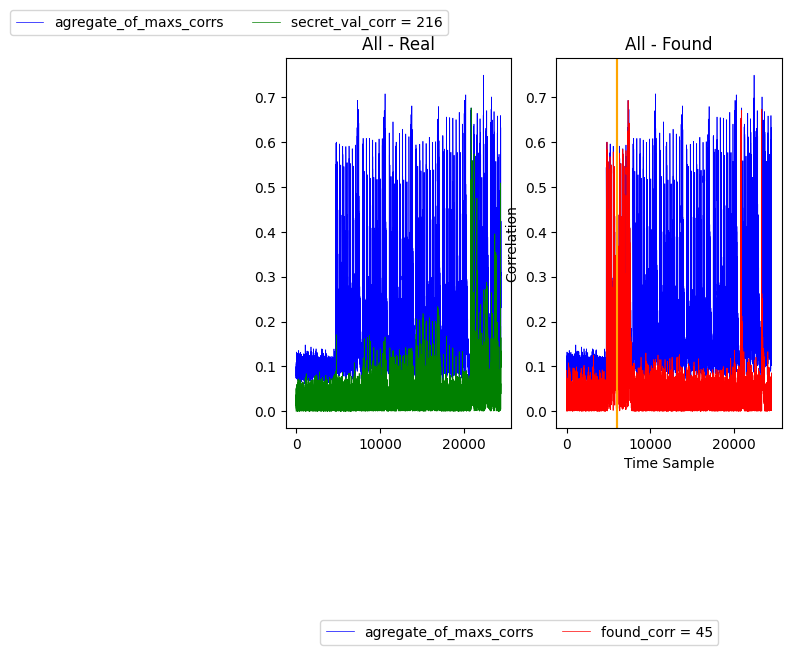

Hello 104
In range 6015 - 24429
 Found the soonest secret value is 45, at the time sample 6089, with correlation secret_corr = 0.555


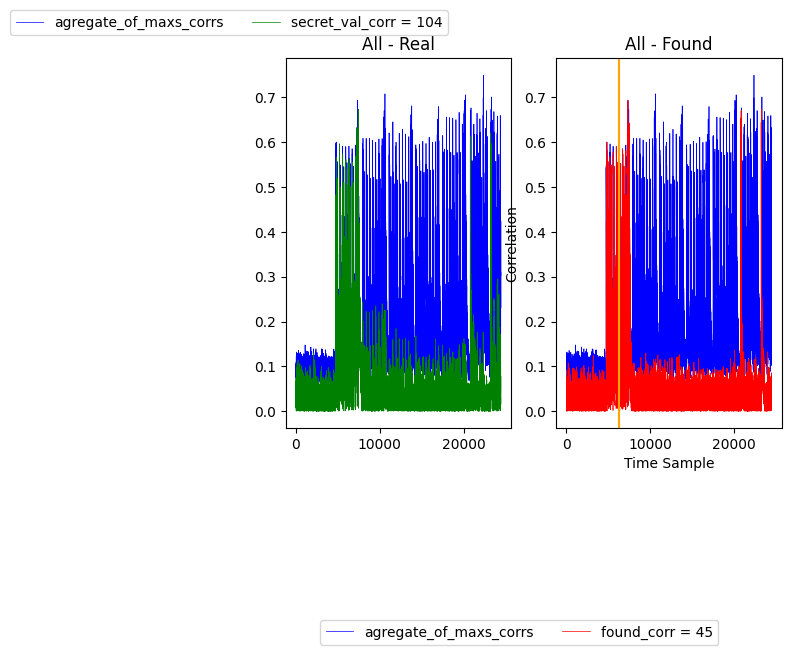

Hello 167
In range 6206 - 24429
 Found the soonest secret value is 160, at the time sample 6322, with correlation secret_corr = 0.591


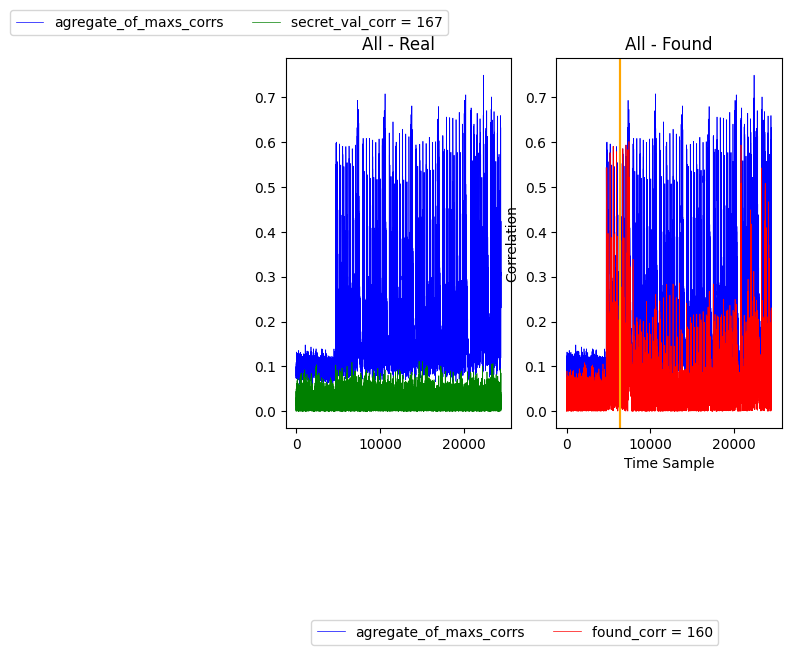

Hello 0
In range 6395 - 24429
 Found the soonest secret value is 45, at the time sample 6469, with correlation secret_corr = 0.553


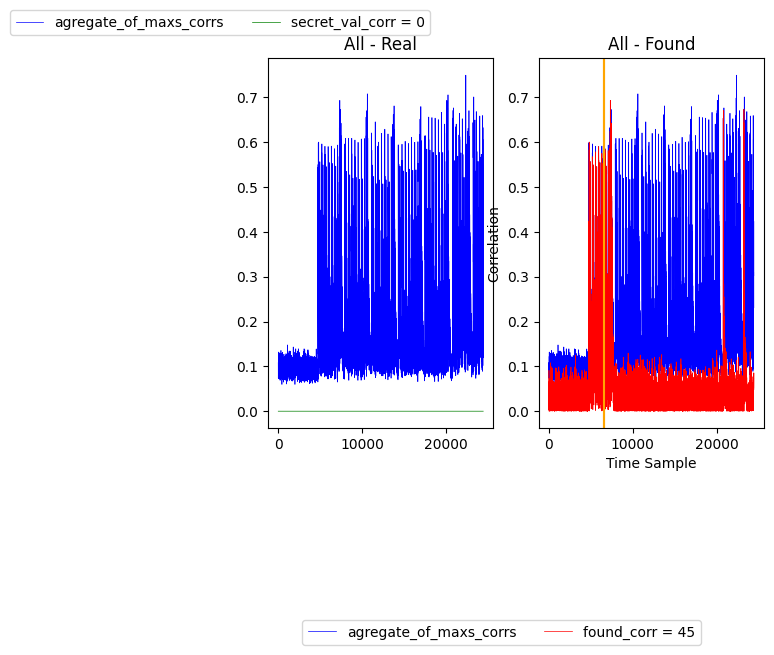

In [10]:
corr_map = abs(np.array(corr_Abs8[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'Abs8_{firmwareName}')

##### CPA, weight extraction - Abs32

Hello 45
Peak range: 0.3
24429
 Index of global max: 11146 and global_max_val: 0.5683197544486045


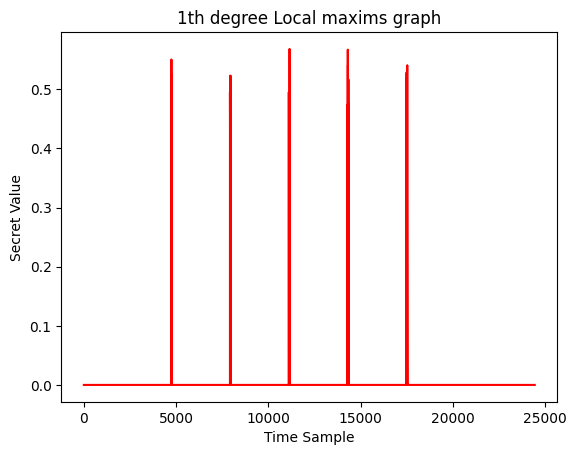

Number of uniques: 37
Number of local maxims: 105
Uniquess: [89, 1, 75, 3, 217, 193, 5, 11, 7, 195, 83, 19, 119, 57, 141, 59, 49, 29, 73, 197, 51, 175, 245, 219, 143, 67, 189, 241, 177, 39, 35, 53, 231, 9, 163, 183, 27]
Local maxims: [89, 1, 75, 3, 217, 89, 193, 5, 11, 7, 3, 11, 5, 195, 1, 83, 5, 19, 119, 3, 57, 89, 141, 59, 57, 75, 217, 57, 7, 49, 57, 1, 5, 29, 73, 3, 197, 7, 29, 5, 51, 175, 59, 245, 57, 219, 11, 75, 141, 143, 73, 57, 75, 5, 75, 1, 197, 67, 189, 75, 241, 75, 19, 75, 5, 177, 39, 1, 51, 5, 35, 75, 143, 53, 219, 7, 5, 5, 231, 197, 143, 89, 89, 177, 9, 19, 197, 1, 163, 163, 7, 5, 7, 197, 9, 183, 5, 11, 119, 27, 5, 75, 5, 57, 5]


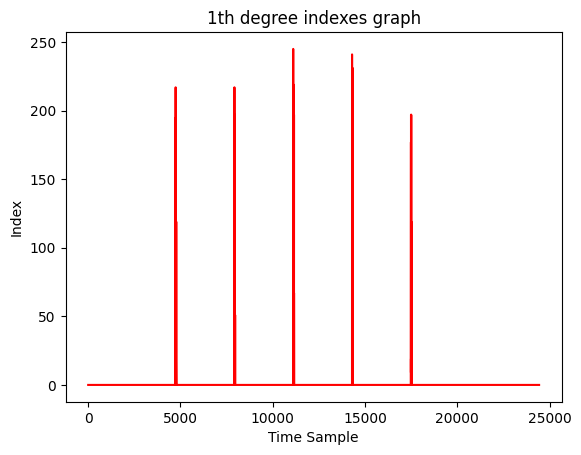

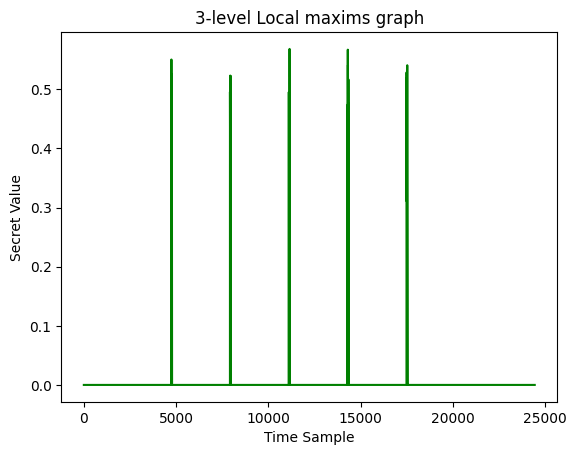

Number of uniques: 39
Number of local maxims: 127
Uniquess: [89, 1, 75, 3, 217, 193, 5, 11, 7, 57, 195, 83, 59, 19, 119, 141, 49, 201, 29, 73, 197, 53, 51, 175, 245, 177, 219, 143, 67, 189, 241, 39, 35, 71, 231, 9, 163, 183, 27]
Local maxims: [89, 1, 75, 3, 217, 75, 89, 193, 5, 11, 7, 57, 3, 11, 5, 57, 195, 1, 83, 59, 5, 19, 57, 119, 3, 57, 19, 89, 141, 59, 57, 3, 75, 217, 57, 7, 49, 57, 1, 5, 201, 29, 73, 3, 197, 7, 53, 29, 5, 51, 175, 59, 245, 57, 177, 219, 11, 143, 75, 141, 143, 73, 57, 75, 5, 5, 75, 1, 245, 197, 67, 189, 75, 241, 75, 19, 75, 5, 177, 39, 1, 51, 5, 5, 35, 71, 75, 143, 53, 219, 7, 3, 5, 5, 231, 197, 143, 89, 89, 1, 177, 9, 19, 11, 197, 1, 163, 57, 163, 7, 5, 3, 7, 197, 9, 59, 183, 5, 11, 119, 27, 5, 5, 75, 5, 57, 5]


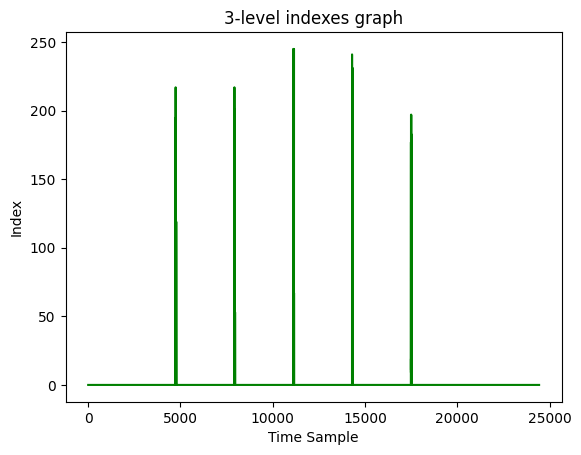

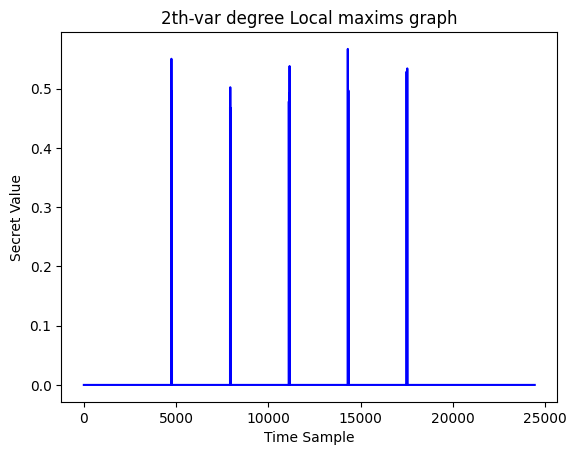

Number of uniques: 7
Number of local maxims: 12
Uniquess: [3, 75, 1, 5, 59, 19, 177]
Local maxims: [3, 3, 75, 1, 5, 59, 75, 75, 19, 5, 177, 5]


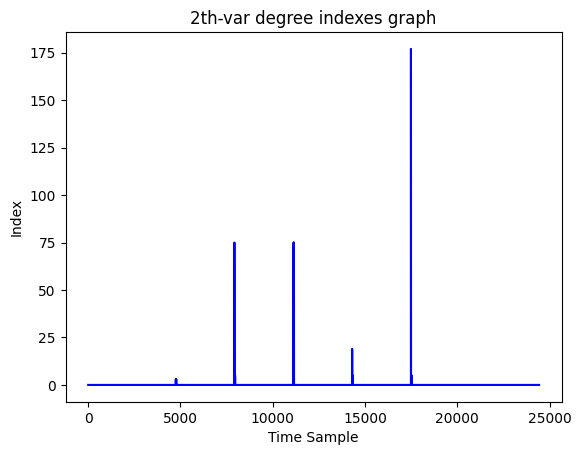

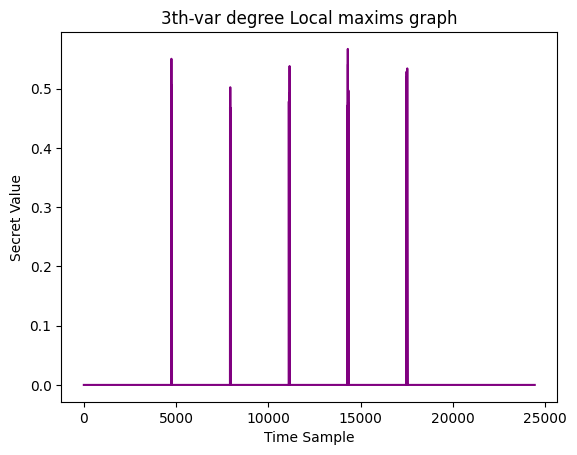

Number of uniques: 33
Number of local maxims: 80
Uniquess: [89, 1, 75, 217, 193, 5, 11, 3, 195, 19, 57, 59, 7, 49, 29, 73, 197, 51, 245, 141, 67, 241, 177, 39, 35, 143, 219, 231, 9, 163, 183, 119, 27]
Local maxims: [89, 1, 75, 217, 89, 193, 5, 11, 3, 11, 5, 195, 1, 5, 19, 3, 57, 89, 59, 75, 217, 57, 7, 49, 1, 5, 29, 73, 197, 7, 5, 51, 59, 245, 57, 75, 141, 73, 57, 75, 75, 1, 197, 67, 75, 241, 19, 75, 5, 177, 39, 1, 5, 35, 75, 143, 219, 7, 5, 231, 89, 177, 9, 19, 197, 1, 163, 163, 7, 7, 197, 9, 183, 5, 119, 27, 5, 5, 57, 5]


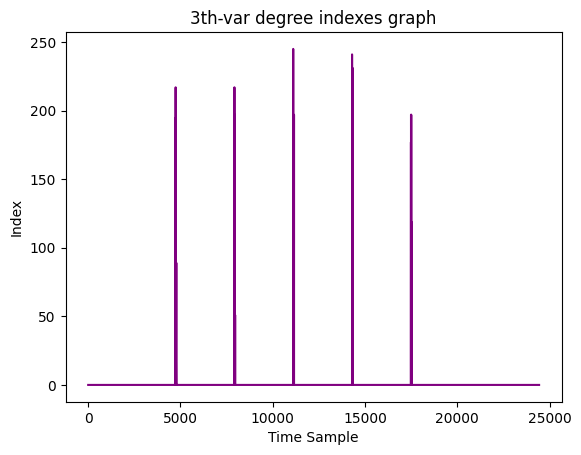

In range 0 - 24429
 Found the soonest secret value is 3, at the time sample 4745, with correlation secret_corr = 0.550


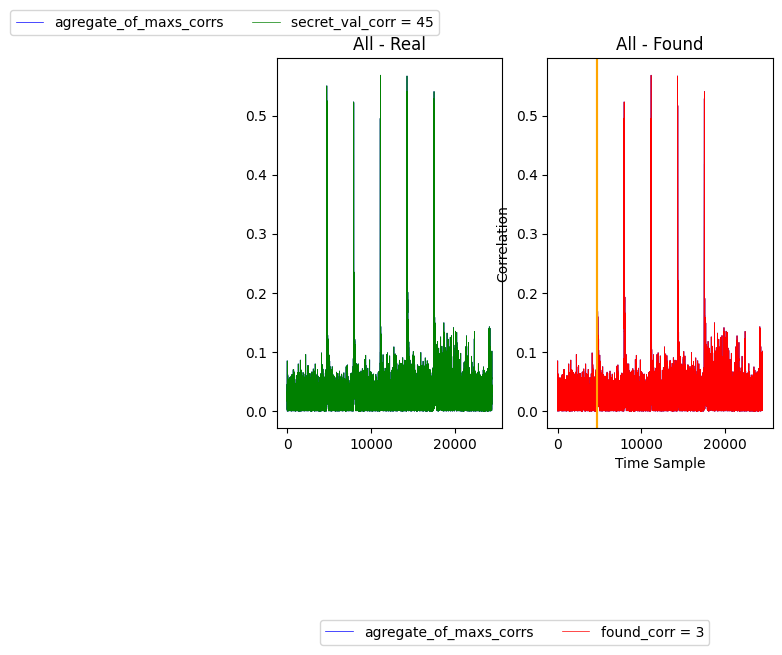

Hello 207
In range 4758 - 24429
 Found the soonest secret value is 3, at the time sample 4771, with correlation secret_corr = 0.496


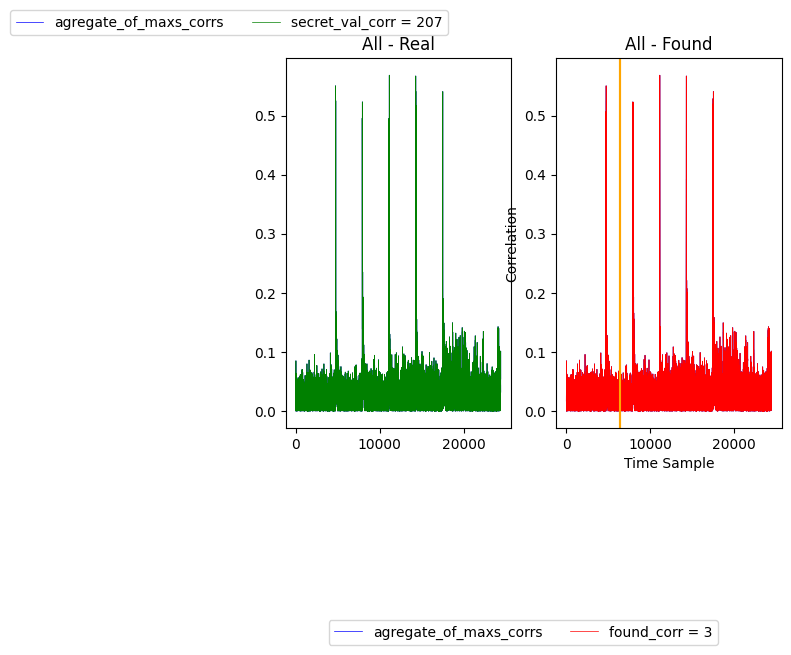

Hello 70
In range 6346 - 24429
 Found the soonest secret value is 75, at the time sample 7921, with correlation secret_corr = 0.469


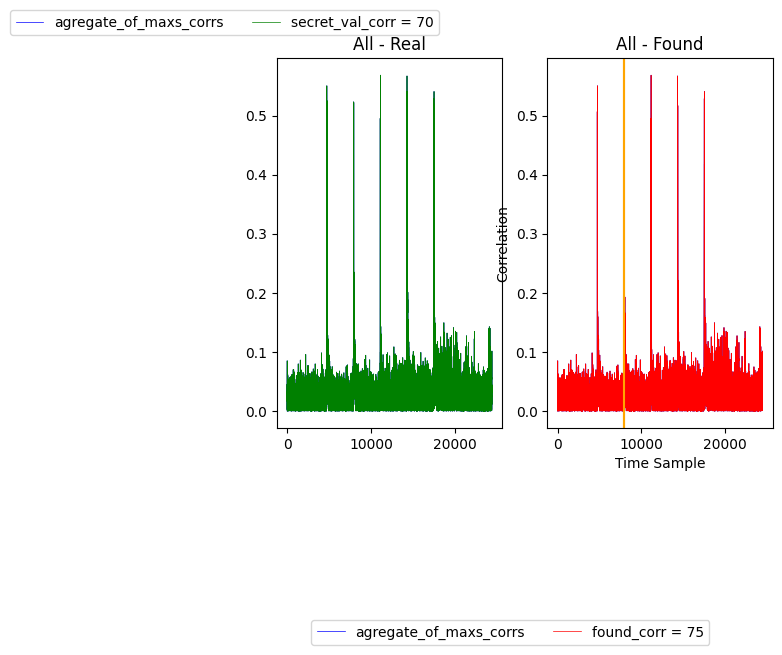

Hello 41
In range 7928 - 24429
 Found the soonest secret value is 1, at the time sample 7934, with correlation secret_corr = 0.502


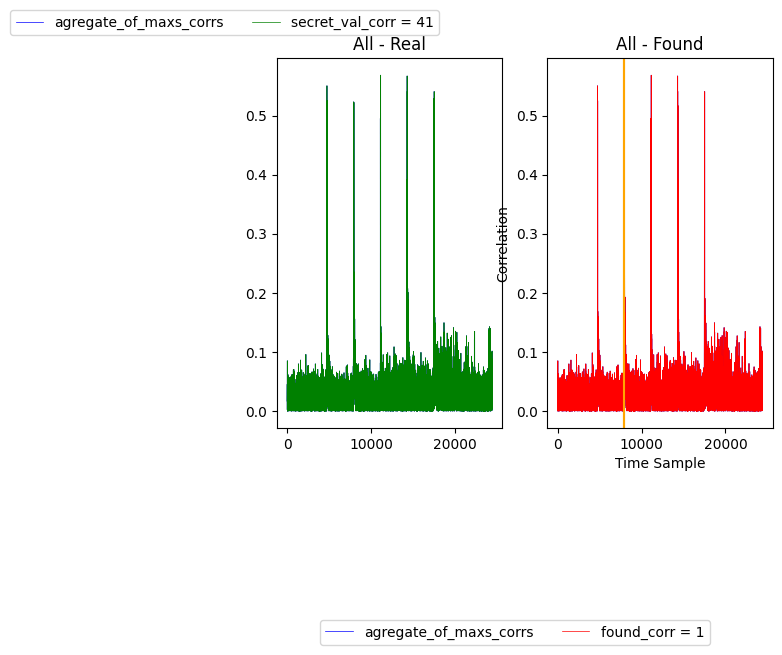

Hello 4
In range 7947 - 24429
 Found the soonest secret value is 5, at the time sample 7959, with correlation secret_corr = 0.467


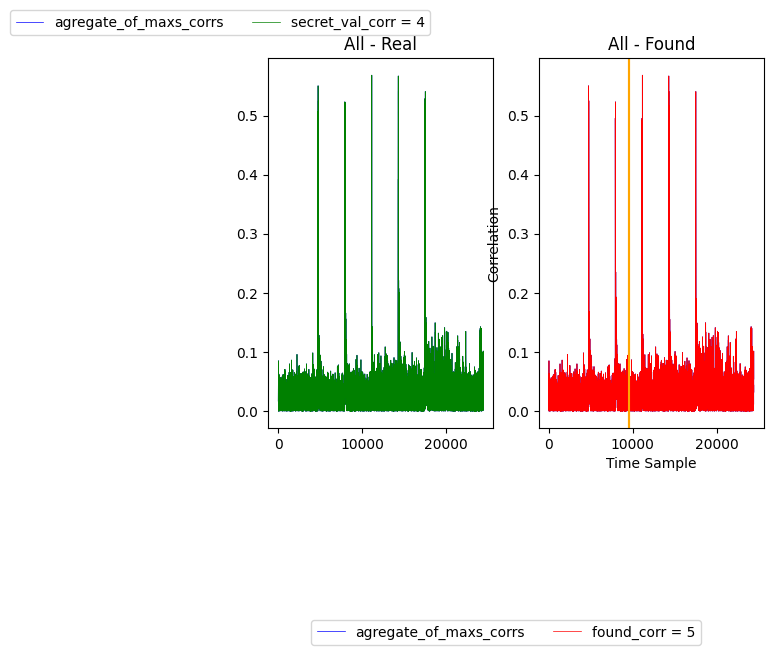

Hello 0
In range 9532 - 24429
 Found the soonest secret value is 59, at the time sample 11106, with correlation secret_corr = 0.478


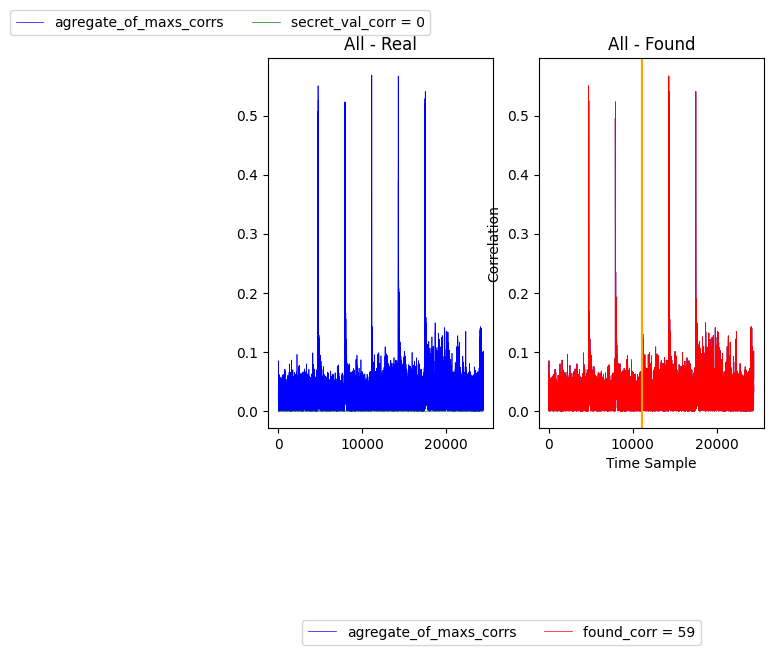

Hello 180
In range 11115 - 24429
 Found the soonest secret value is 75, at the time sample 11125, with correlation secret_corr = 0.492


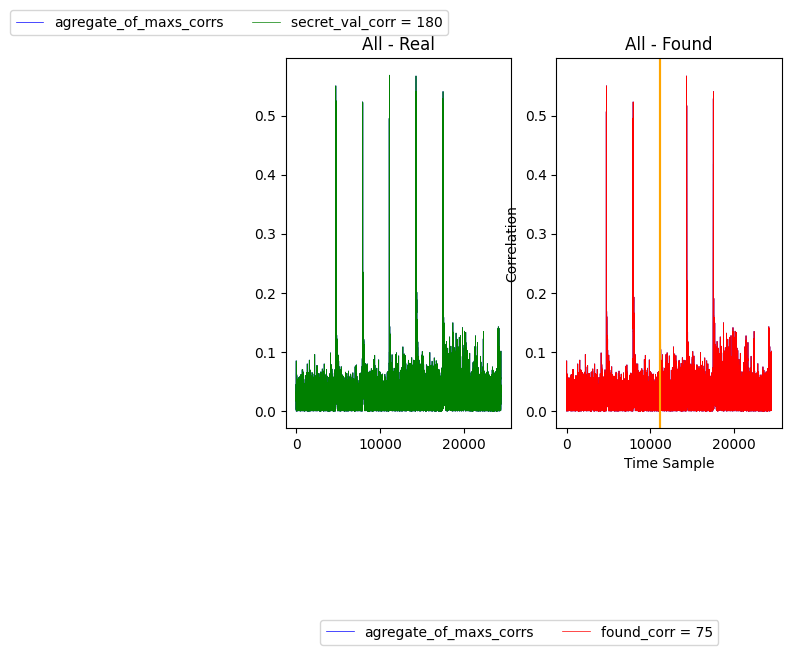

Hello 120
In range 11136 - 24429
 Found the soonest secret value is 75, at the time sample 11147, with correlation secret_corr = 0.538


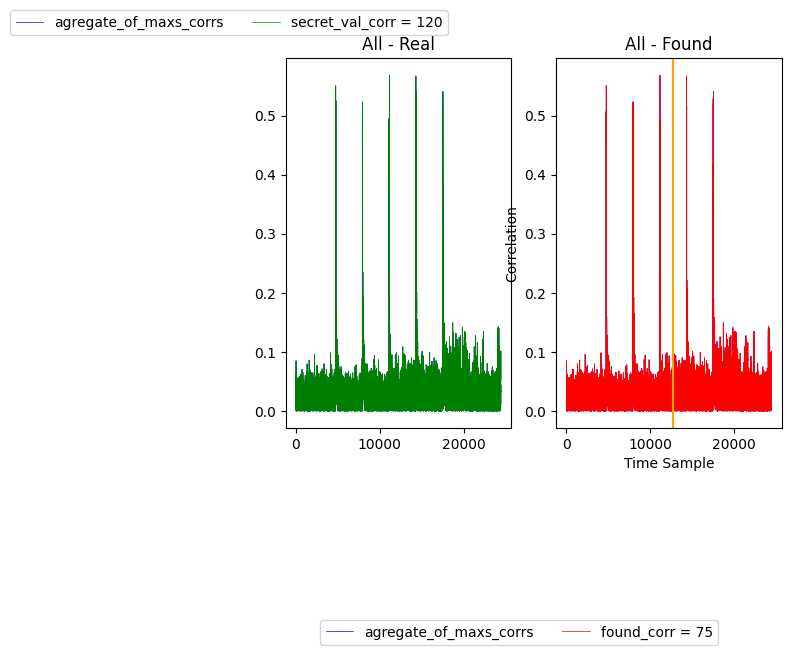

Hello 216
In range 12724 - 24429
 Found the soonest secret value is 19, at the time sample 14301, with correlation secret_corr = 0.567


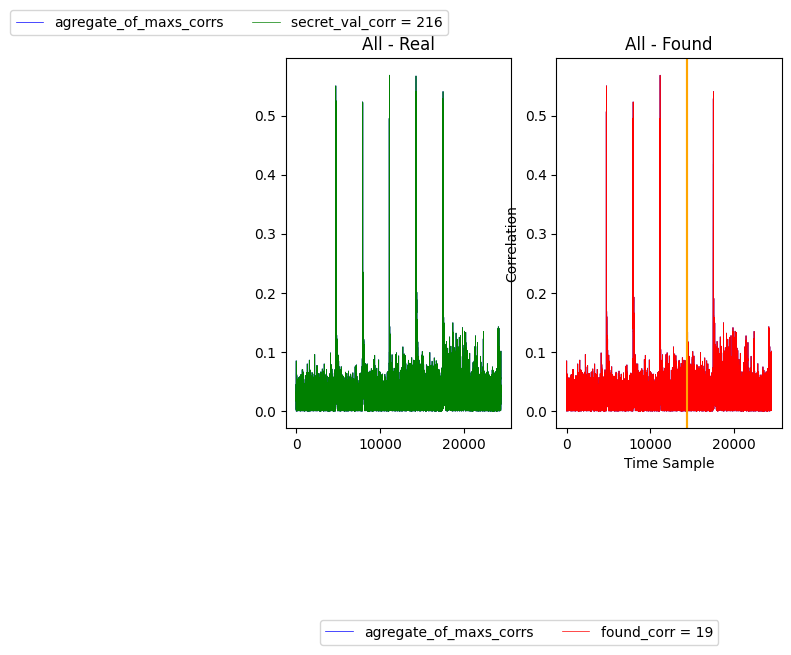

Hello 104
In range 14318 - 24429
 Found the soonest secret value is 5, at the time sample 14335, with correlation secret_corr = 0.497


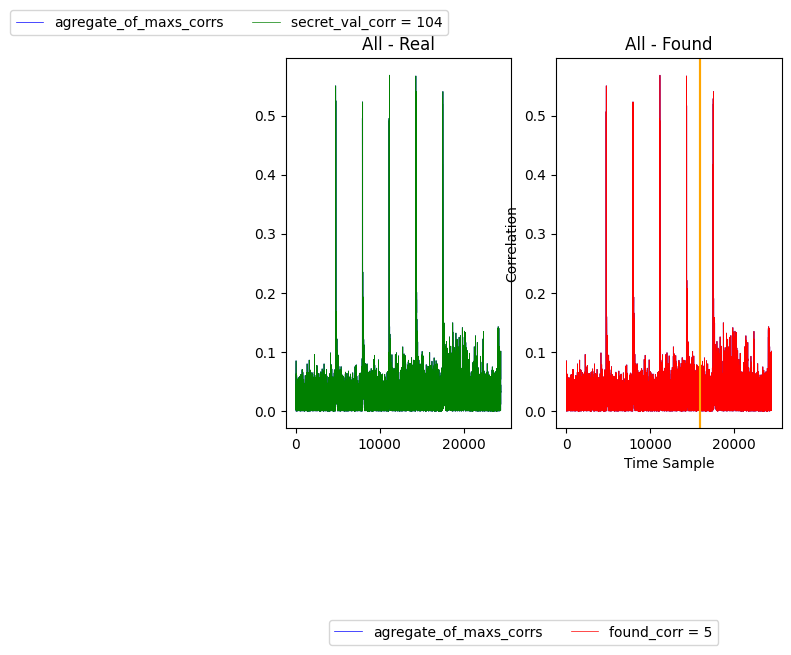

Hello 167
In range 15910 - 24429
 Found the soonest secret value is 177, at the time sample 17485, with correlation secret_corr = 0.529


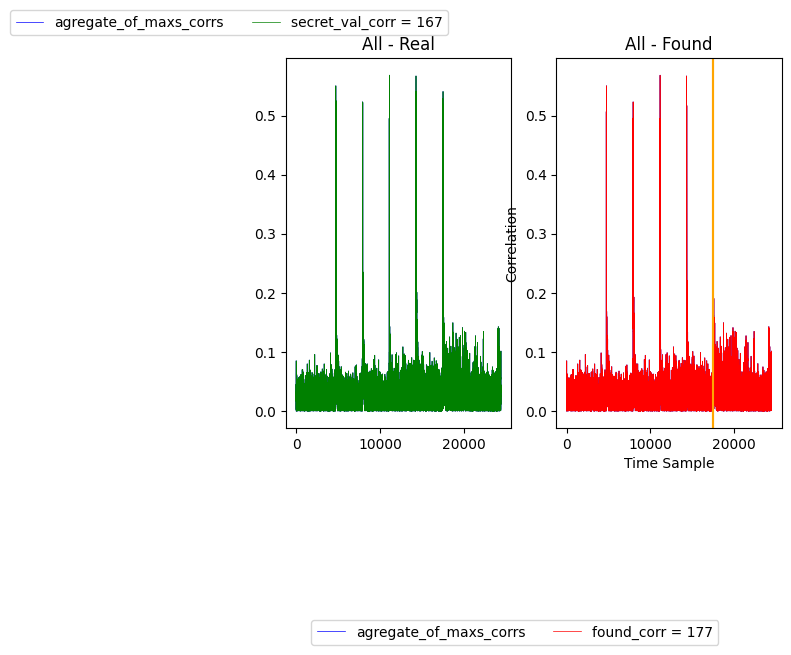

Hello 0
In range 17504 - 24429
 Found the soonest secret value is 5, at the time sample 17523, with correlation secret_corr = 0.534


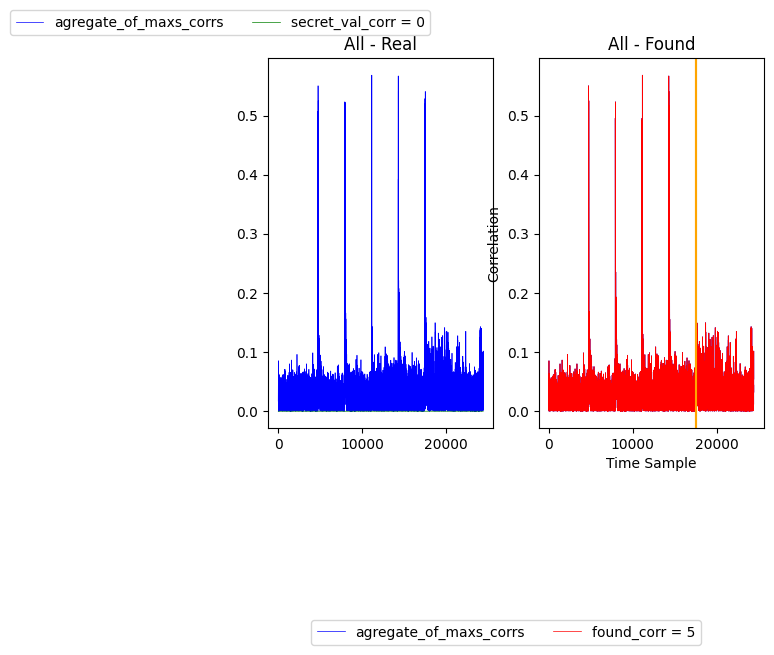

In [11]:
corr_map = abs(np.array(corr_Abs32[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'Abs32_{firmwareName}')

##### CPA, weight extraction - HW32

Hello 45
Peak range: 0.3
24429
 Index of global max: 17497 and global_max_val: 0.9692057073020393


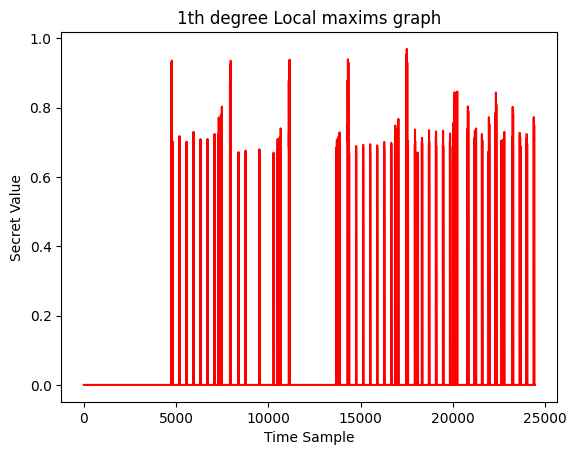

Number of uniques: 8
Number of local maxims: 362
Uniquess: [1, 45, 207, 129, 35, 41, 177, 101]
Local maxims: [1, 1, 1, 45, 45, 45, 45, 1, 1, 1, 1, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 1, 1, 1, 1, 1, 207, 207, 207, 207, 1, 1, 1, 1, 1, 1, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 1, 1, 1, 129, 129, 35, 35, 35, 35, 35, 35, 1, 1, 1, 1, 1, 1, 1, 1, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 1, 1, 1, 1, 1, 1, 1, 41, 1, 41, 41, 41, 1, 1, 1, 1, 1, 1, 1, 1, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

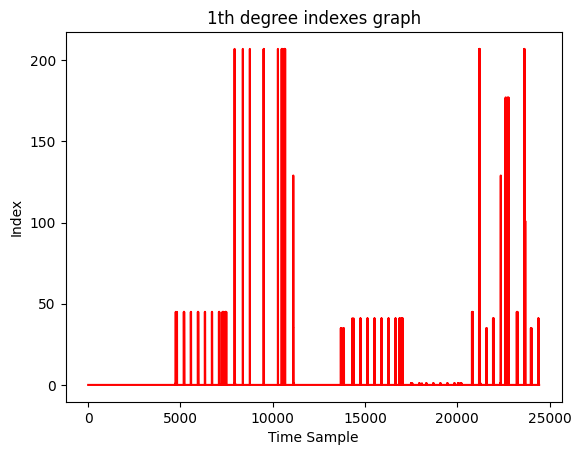

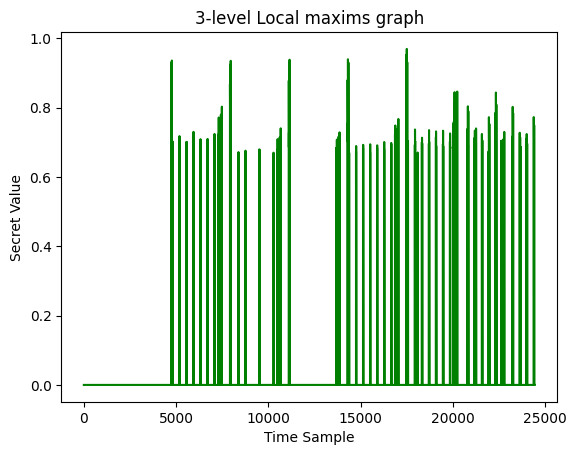

Number of uniques: 8
Number of local maxims: 438
Uniquess: [1, 45, 207, 129, 35, 41, 177, 101]
Local maxims: [1, 1, 1, 45, 45, 45, 45, 45, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 1, 1, 1, 1, 1, 207, 207, 207, 207, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 1, 1, 1, 129, 129, 35, 35, 35, 35, 35, 35, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 1, 1, 1, 1, 1, 1, 1, 41, 1, 41, 41, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

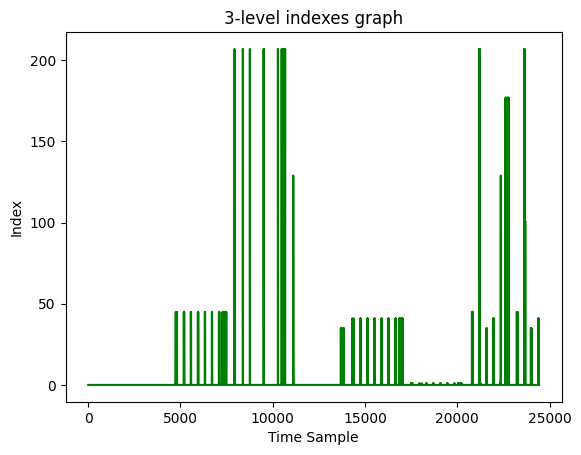

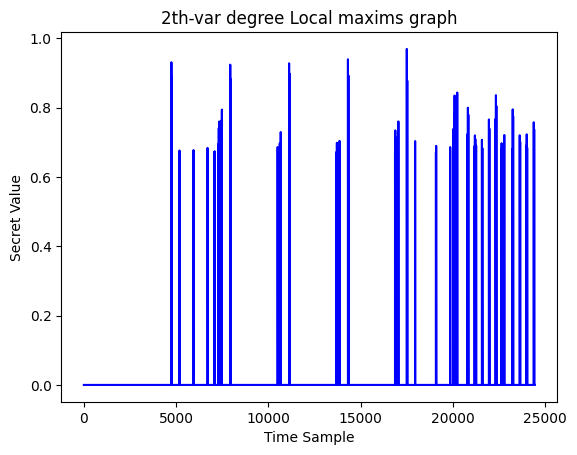

Number of uniques: 6
Number of local maxims: 77
Uniquess: [1, 45, 207, 35, 41, 177]
Local maxims: [1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 207, 207, 207, 207, 207, 1, 1, 35, 35, 35, 35, 1, 1, 41, 41, 41, 41, 41, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 45, 45, 207, 207, 207, 1, 35, 35, 41, 41, 1, 1, 1, 177, 177, 177, 177, 177, 45, 45, 45, 207, 207, 35, 35, 35, 41, 41]


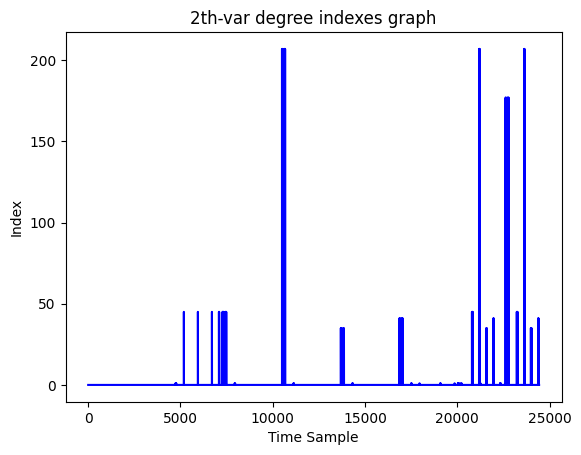

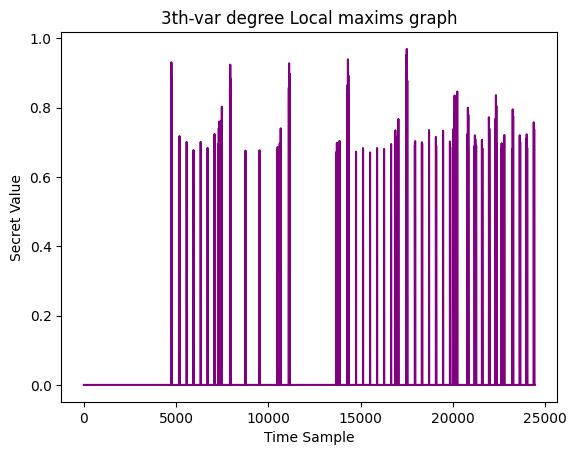

Number of uniques: 7
Number of local maxims: 242
Uniquess: [1, 45, 207, 129, 35, 41, 177]
Local maxims: [1, 1, 1, 45, 45, 1, 1, 1, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 1, 1, 1, 207, 207, 1, 1, 1, 1, 1, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 1, 1, 129, 35, 35, 35, 35, 1, 1, 1, 1, 1, 1, 1, 35, 35, 35, 35, 35, 35, 1, 1, 1, 1, 1, 41, 41, 41, 1, 1, 1, 1, 1, 1, 1, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 207, 207, 207, 207, 207, 207, 207, 1, 1, 35, 35, 35, 35, 41, 41, 41, 41, 41, 41, 41, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 129, 129, 177, 177, 177, 177, 177, 177, 177, 177, 45, 45, 45, 45, 45, 45, 45, 45, 207, 207, 207, 207, 35, 35, 35, 35, 35, 35, 35, 35, 41, 41, 41

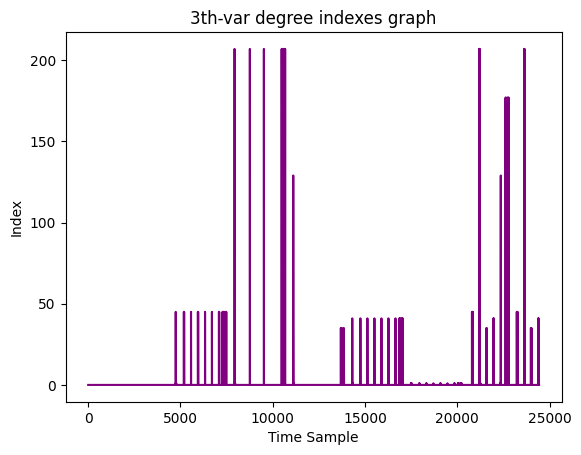

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4730, with correlation secret_corr = 0.858


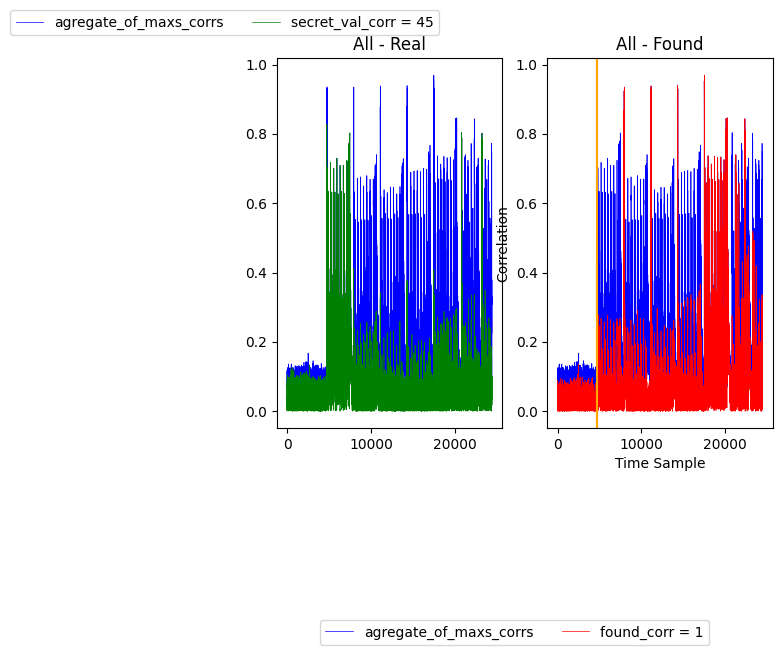

Hello 207
In range 4737 - 24429
 Found the soonest secret value is 1, at the time sample 4745, with correlation secret_corr = 0.931


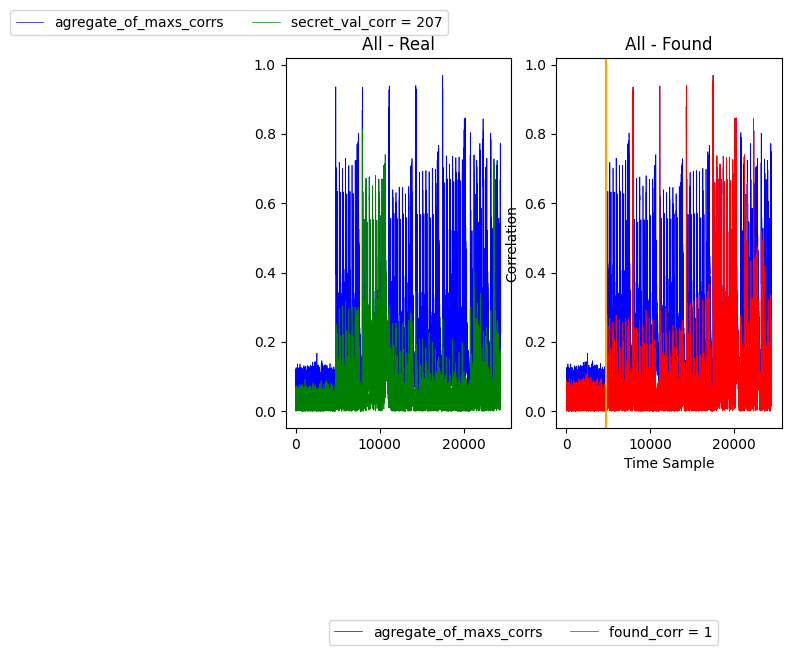

Hello 70
In range 4758 - 24429
 Found the soonest secret value is 1, at the time sample 4771, with correlation secret_corr = 0.887


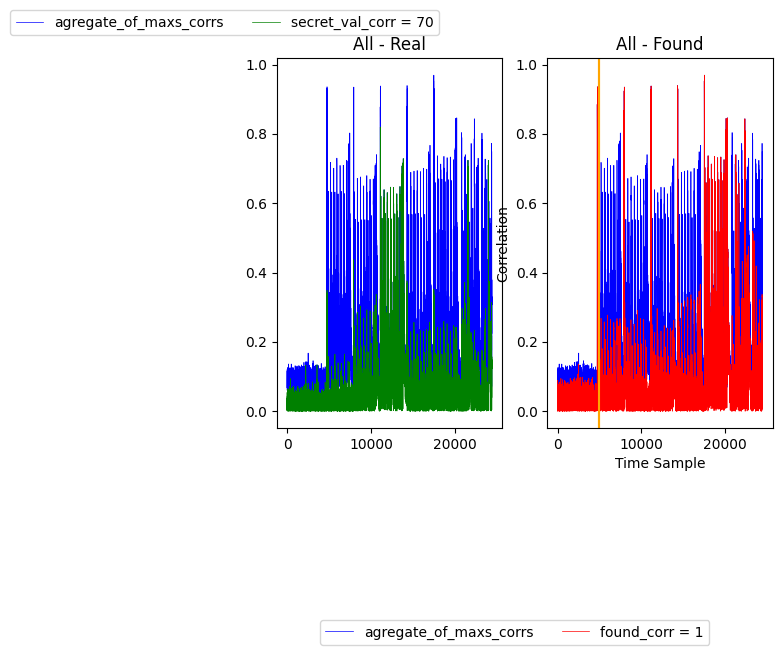

Hello 41
In range 4977 - 24429
 Found the soonest secret value is 45, at the time sample 5183, with correlation secret_corr = 0.676


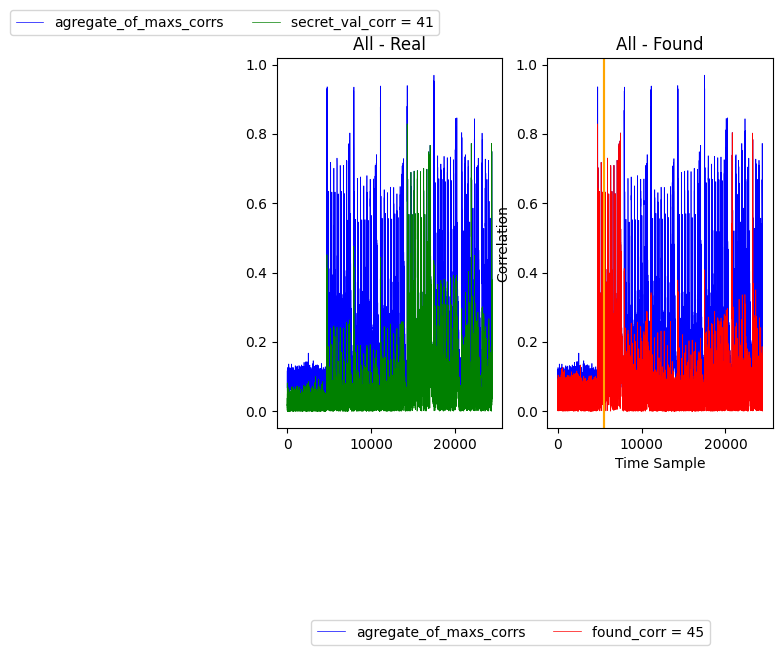

Hello 4
In range 5563 - 24429
 Found the soonest secret value is 45, at the time sample 5943, with correlation secret_corr = 0.677


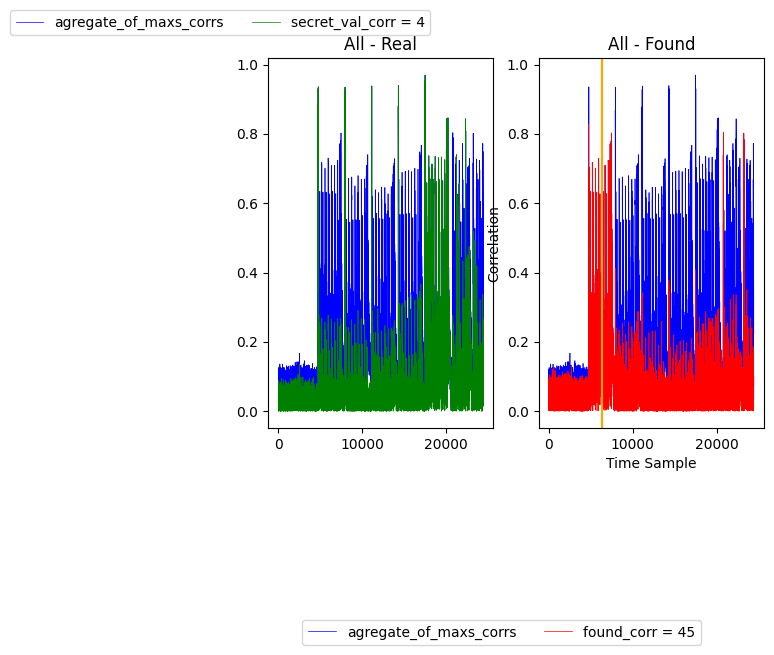

Hello 0
In range 6323 - 24429
 Found the soonest secret value is 45, at the time sample 6703, with correlation secret_corr = 0.684


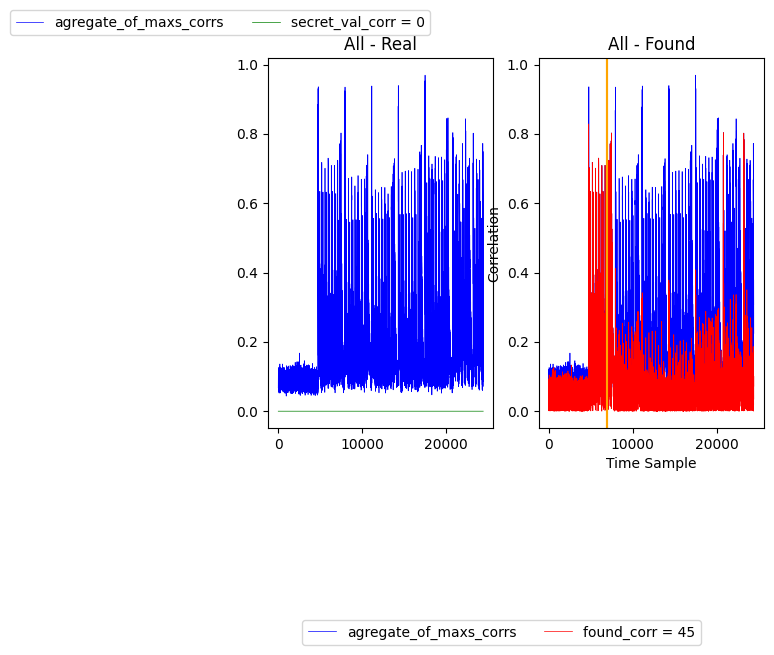

Hello 180
In range 6893 - 24429
 Found the soonest secret value is 45, at the time sample 7083, with correlation secret_corr = 0.673


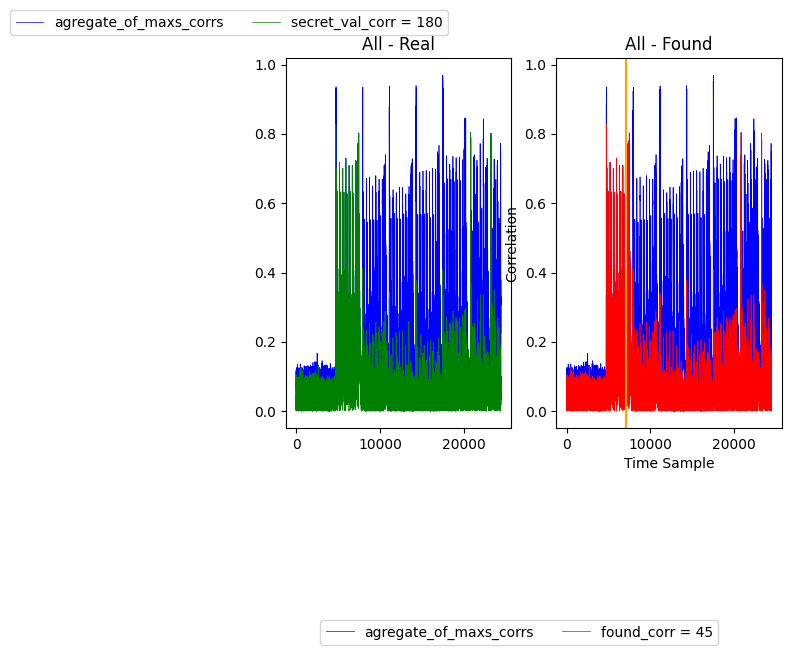

Hello 120
In range 7088 - 24429
 Found the soonest secret value is 45, at the time sample 7094, with correlation secret_corr = 0.673


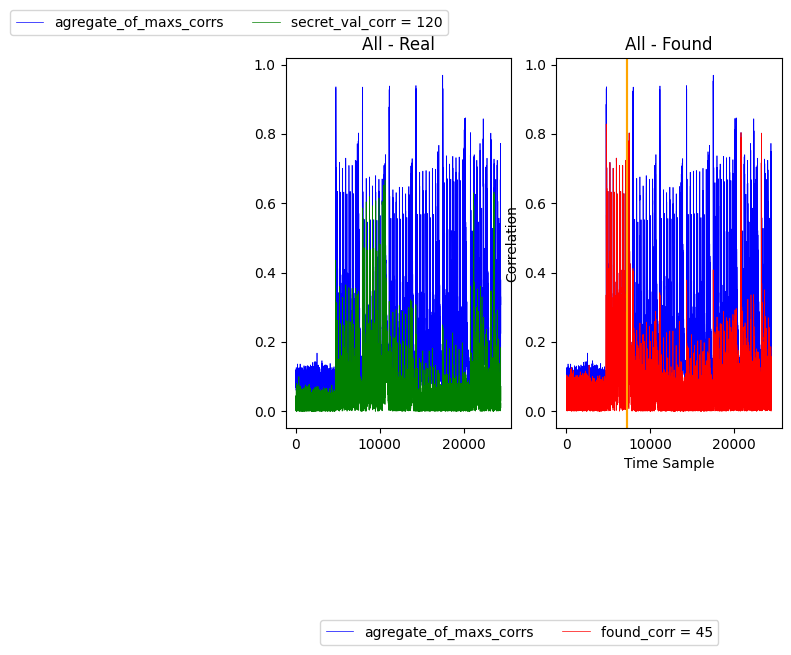

Hello 216
In range 7187 - 24429
 Found the soonest secret value is 45, at the time sample 7279, with correlation secret_corr = 0.694


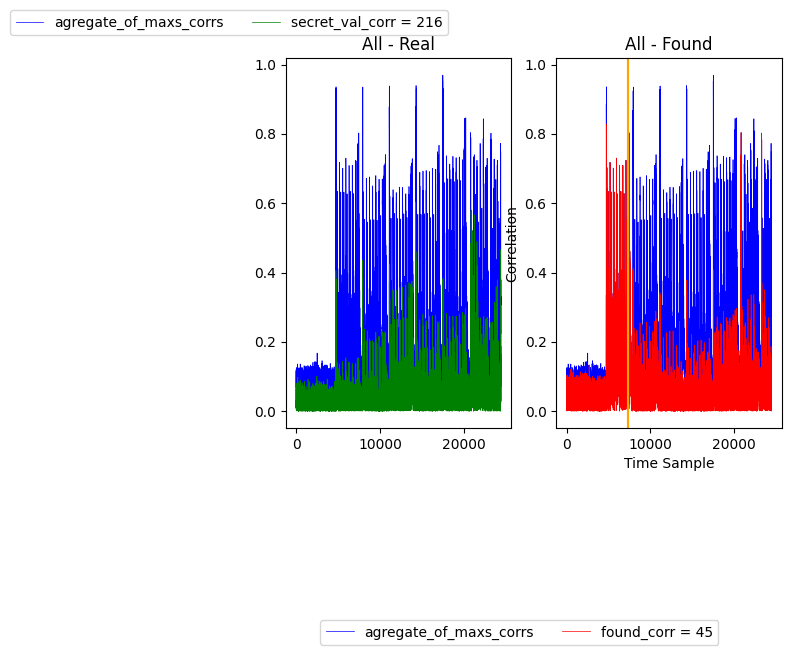

Hello 104
In range 7287 - 24429
 Found the soonest secret value is 45, at the time sample 7295, with correlation secret_corr = 0.678


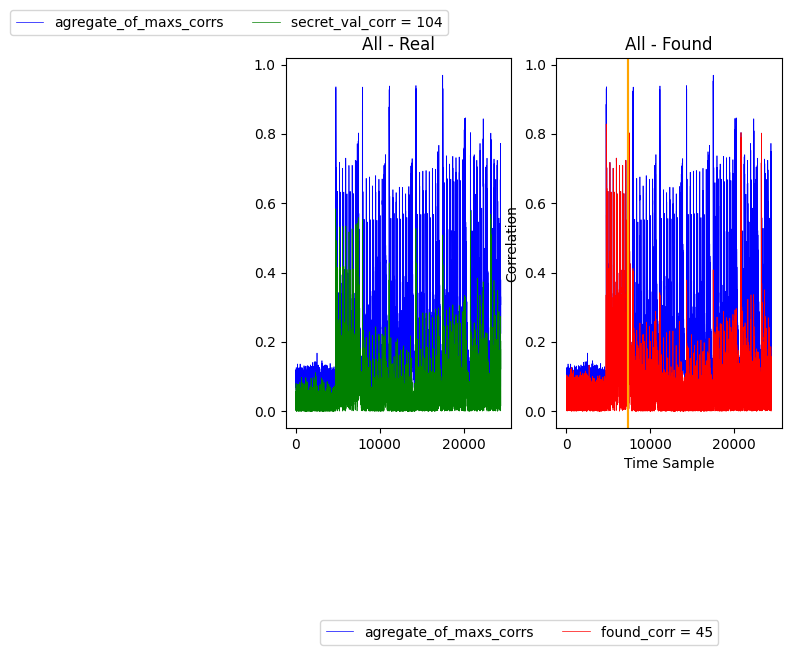

Hello 167
In range 7303 - 24429
 Found the soonest secret value is 45, at the time sample 7311, with correlation secret_corr = 0.741


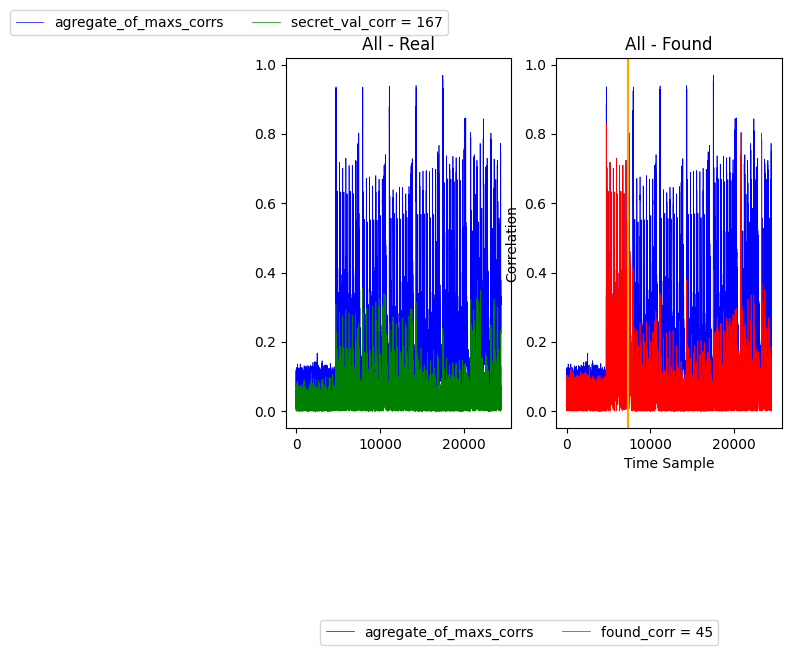

Hello 0
In range 7322 - 24429
 Found the soonest secret value is 45, at the time sample 7334, with correlation secret_corr = 0.760


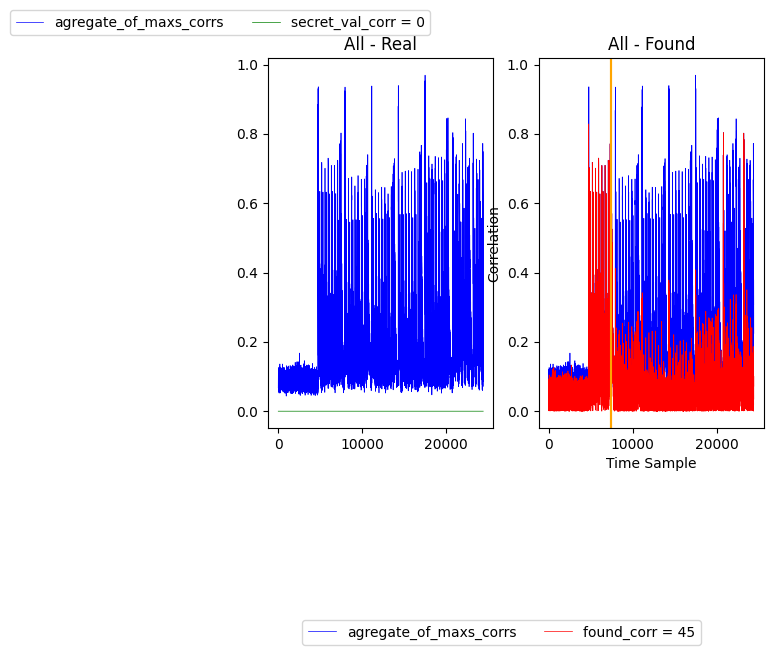

In [12]:
corr_map = abs(np.array(corr_HW32[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'HW32_{firmwareName}')

##### CPA, weight extraction - HW8

Hello 45
Peak range: 0.3
24429
 Index of global max: 21185 and global_max_val: 0.9839490533913412


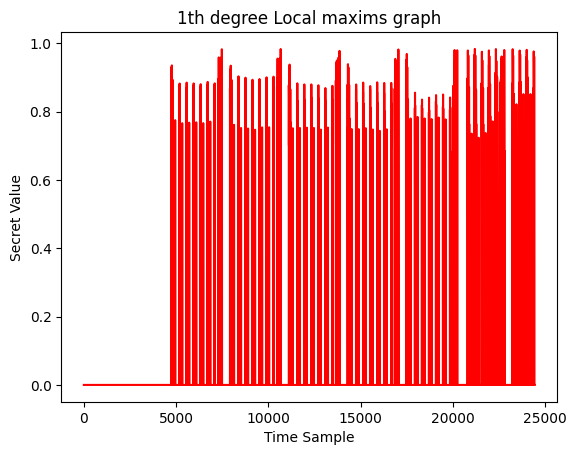

Number of uniques: 24
Number of local maxims: 1006
Uniquess: [1, 45, 180, 207, 2, 35, 70, 41, 4, 104, 59, 216, 22, 220, 82, 149, 113, 177, 136, 221, 101, 152, 253, 187]
Local maxims: [1, 1, 1, 45, 45, 45, 1, 1, 1, 1, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 180, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 1, 1, 1, 1, 1, 207, 207, 207, 1, 1, 1, 1, 1, 1, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207

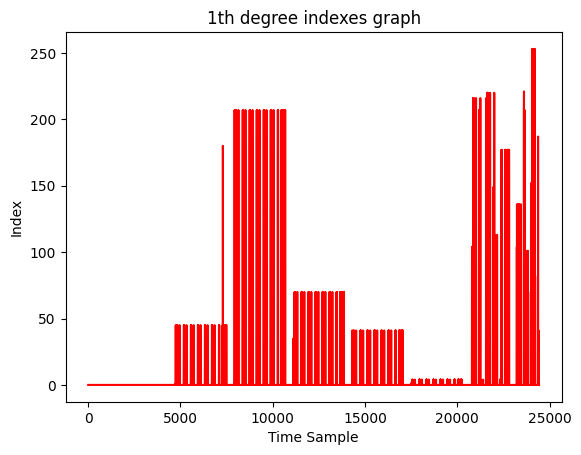

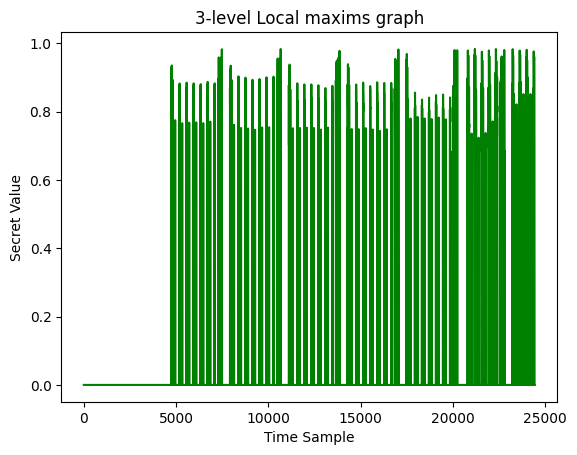

Number of uniques: 24
Number of local maxims: 1261
Uniquess: [1, 45, 180, 207, 2, 35, 70, 41, 4, 104, 59, 216, 22, 220, 82, 149, 113, 177, 136, 221, 101, 152, 253, 187]
Local maxims: [1, 1, 1, 45, 45, 45, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 180, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 1, 1, 1, 1, 1, 207, 207, 207, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207,

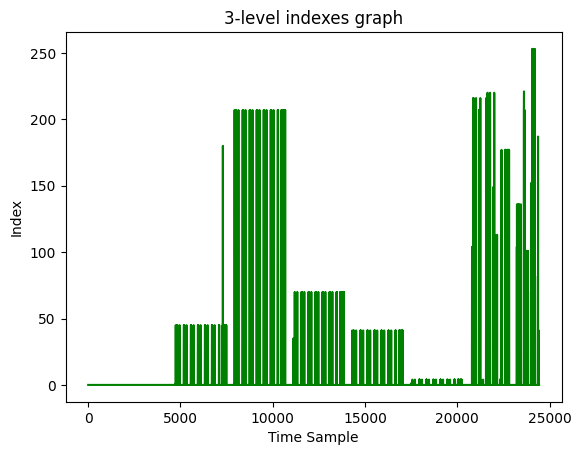

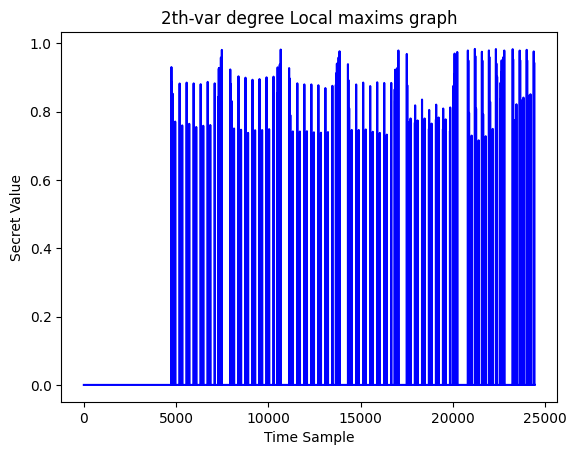

Number of uniques: 13
Number of local maxims: 161
Uniquess: [1, 45, 207, 70, 41, 4, 216, 220, 113, 177, 136, 101, 253]
Local maxims: [1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 1, 1, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 1, 1, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 45, 45, 216, 216, 207, 207, 216, 4, 4, 70, 70, 4, 220, 220, 41, 41, 113, 113, 4, 4, 177, 177, 177, 177, 177, 177, 177, 177, 45, 45, 136, 136, 207, 207, 101, 101, 101, 70, 70, 253, 253, 253, 41, 41]


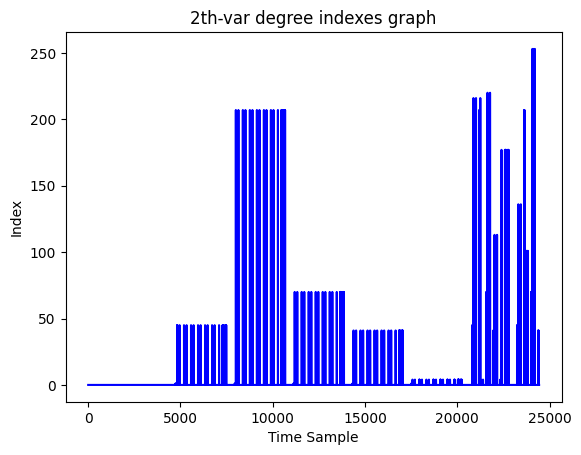

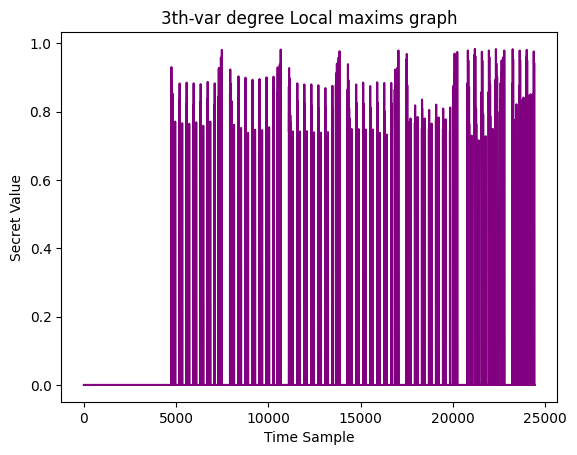

Number of uniques: 22
Number of local maxims: 685
Uniquess: [1, 45, 180, 207, 2, 35, 70, 41, 4, 104, 216, 22, 220, 82, 149, 113, 177, 136, 221, 101, 253, 187]
Local maxims: [1, 1, 1, 45, 1, 1, 1, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 180, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 1, 1, 207, 207, 1, 1, 1, 1, 1, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 1, 2, 2, 2,

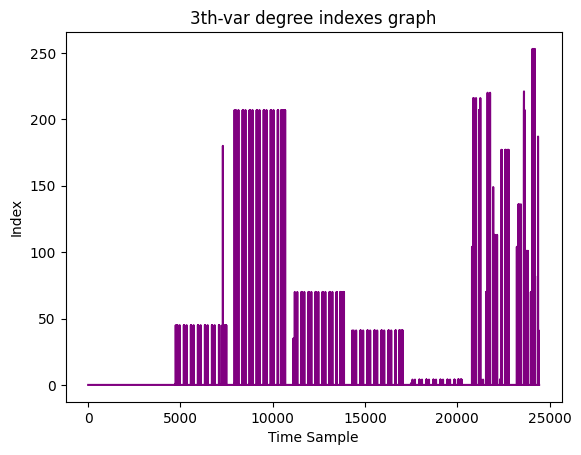

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4730, with correlation secret_corr = 0.858


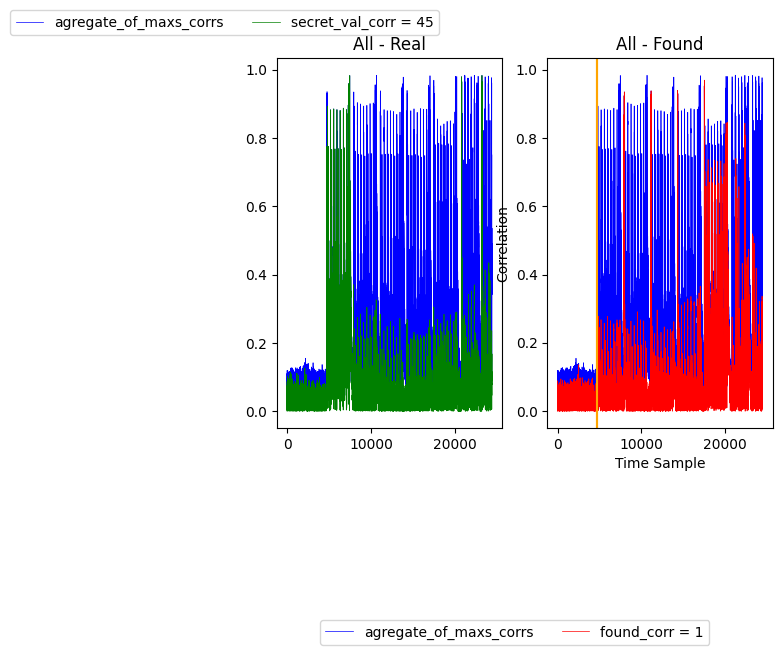

Hello 207
In range 4737 - 24429
 Found the soonest secret value is 1, at the time sample 4745, with correlation secret_corr = 0.931


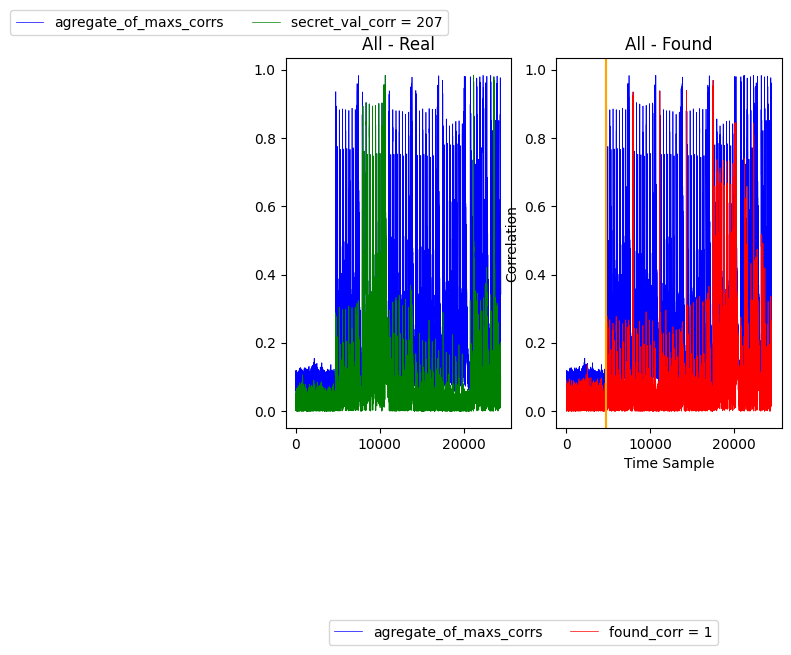

Hello 70
In range 4758 - 24429
 Found the soonest secret value is 1, at the time sample 4771, with correlation secret_corr = 0.887


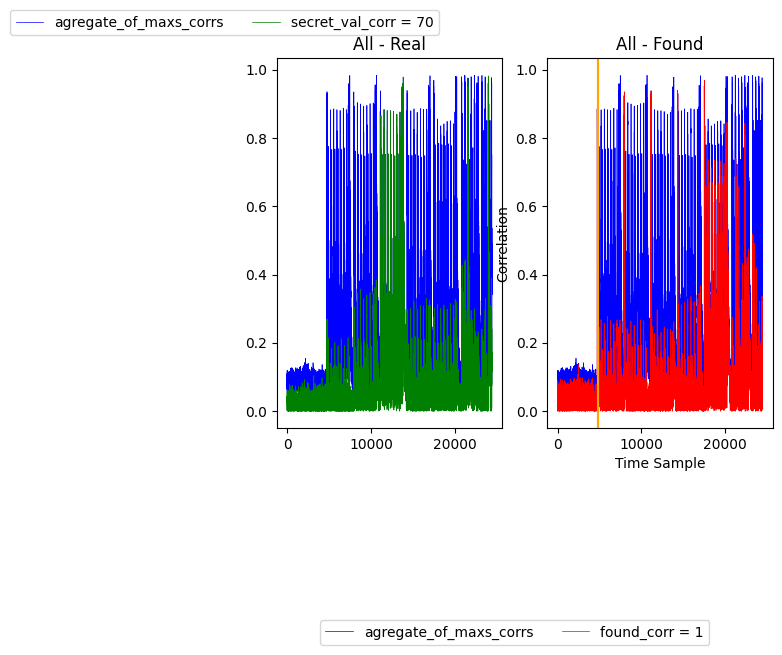

Hello 41
In range 4792 - 24429
 Found the soonest secret value is 45, at the time sample 4814, with correlation secret_corr = 0.853


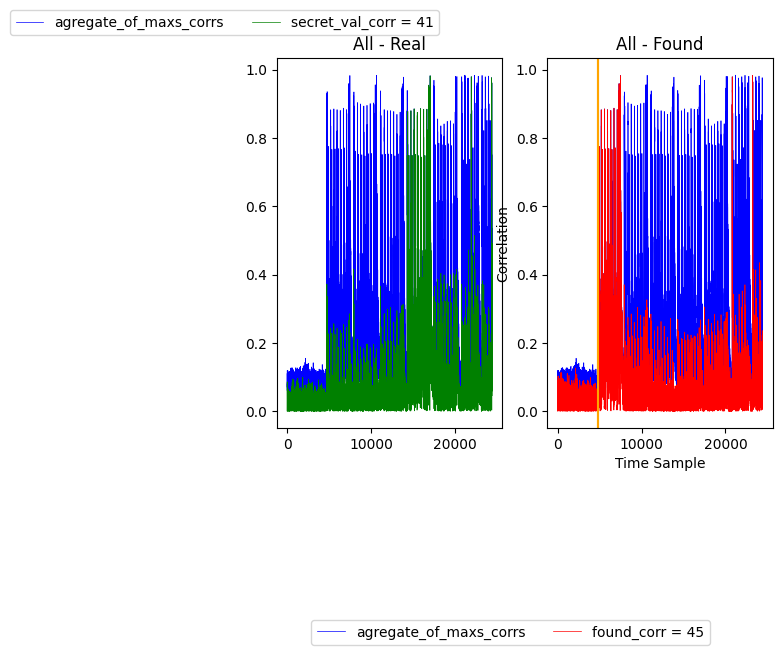

Hello 4
In range 4821 - 24429
 Found the soonest secret value is 45, at the time sample 4829, with correlation secret_corr = 0.688


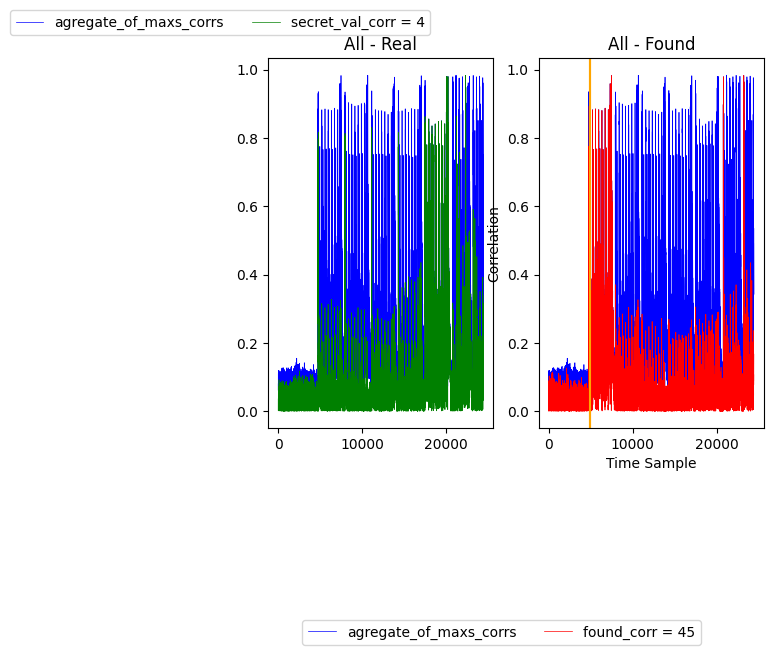

Hello 0
In range 4890 - 24429
 Found the soonest secret value is 45, at the time sample 4950, with correlation secret_corr = 0.771


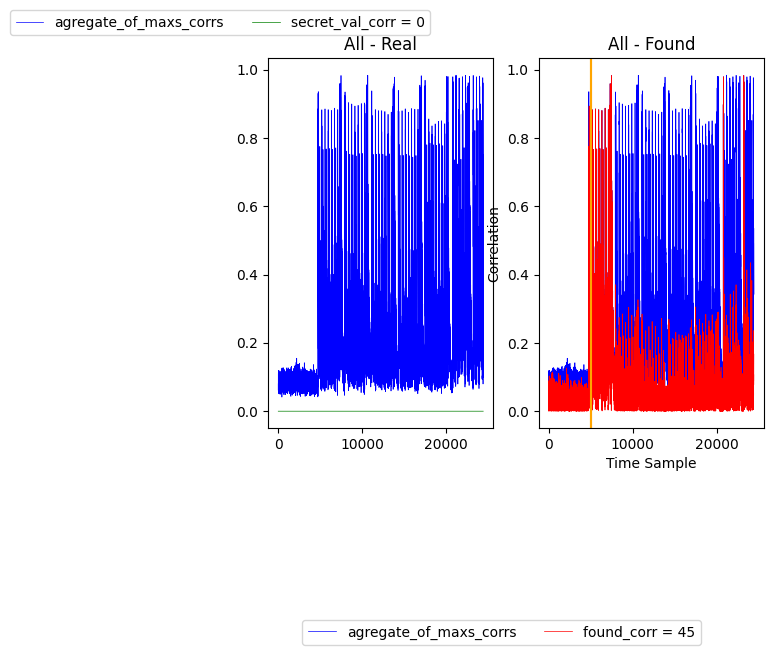

Hello 180
In range 5070 - 24429
 Found the soonest secret value is 45, at the time sample 5190, with correlation secret_corr = 0.883


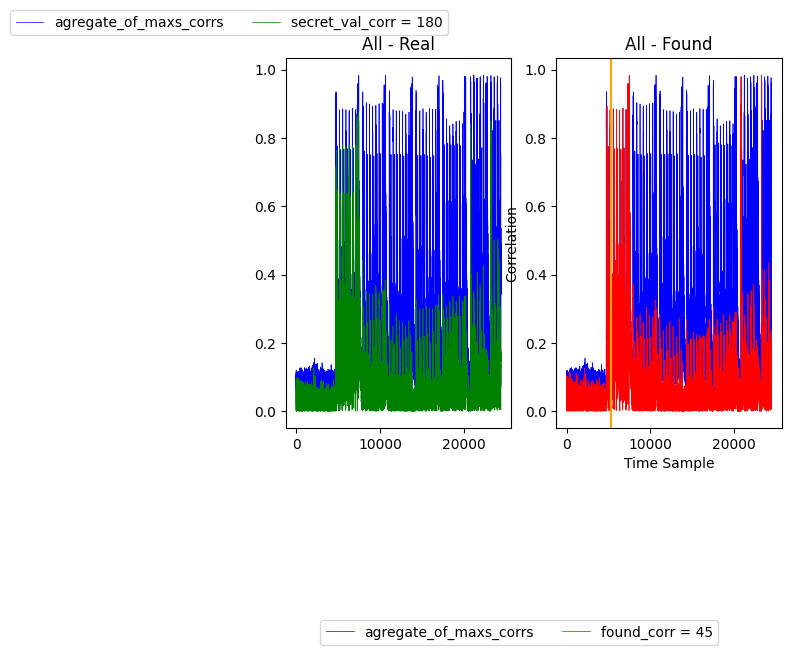

Hello 120
In range 5260 - 24429
 Found the soonest secret value is 45, at the time sample 5330, with correlation secret_corr = 0.760


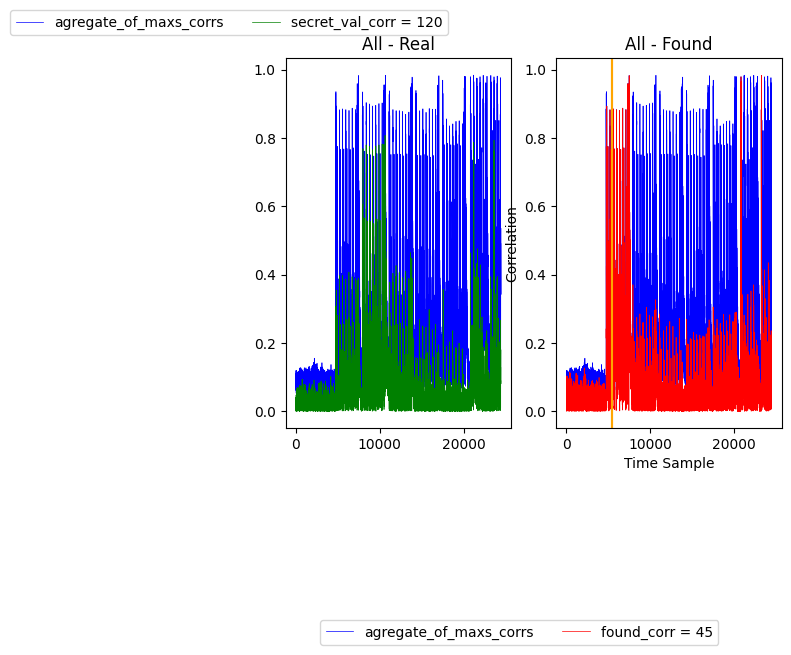

Hello 216
In range 5450 - 24429
 Found the soonest secret value is 45, at the time sample 5570, with correlation secret_corr = 0.885


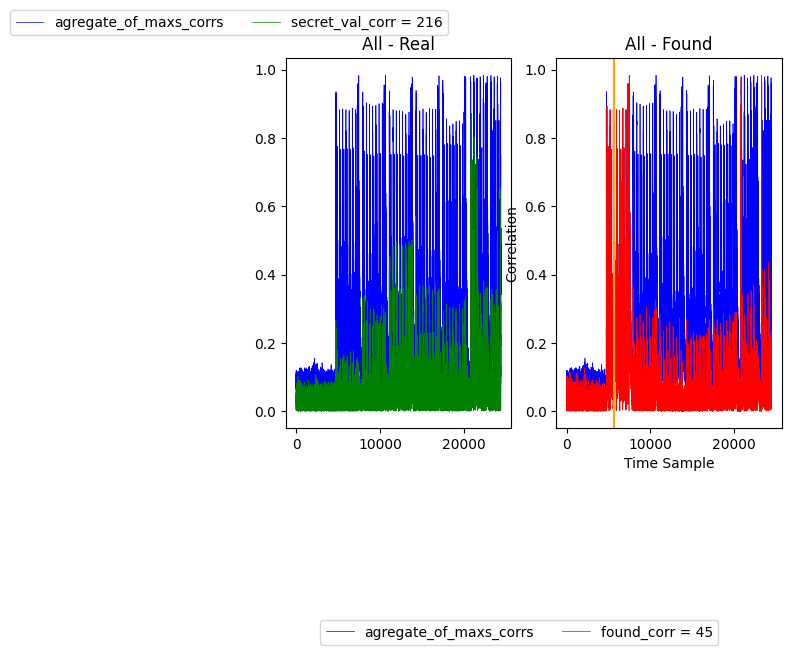

Hello 104
In range 5640 - 24429
 Found the soonest secret value is 45, at the time sample 5710, with correlation secret_corr = 0.765


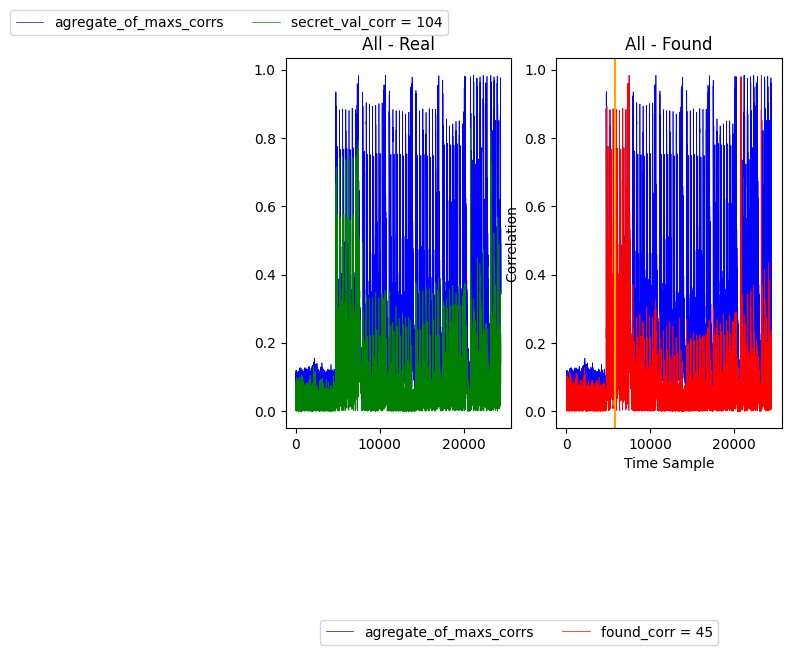

Hello 167
In range 5830 - 24429
 Found the soonest secret value is 45, at the time sample 5950, with correlation secret_corr = 0.883


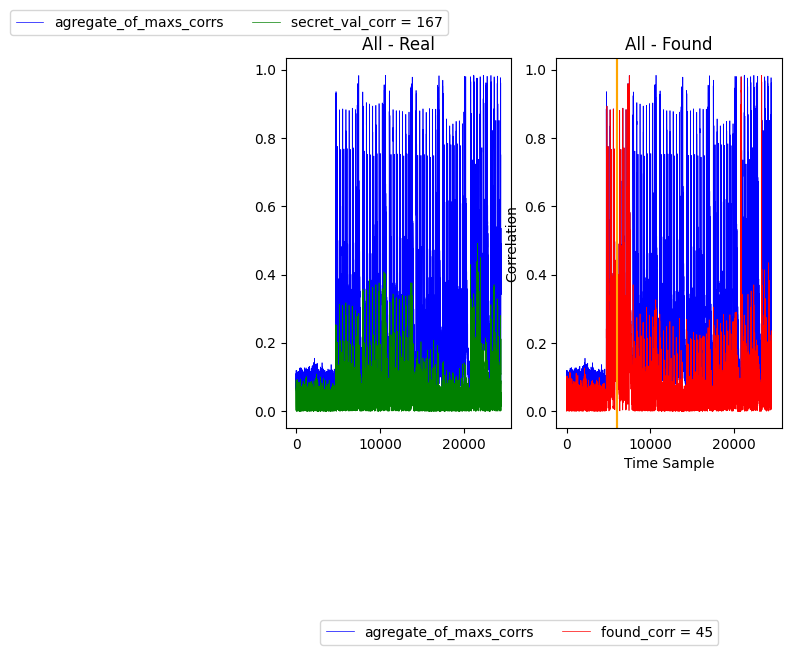

Hello 0
In range 6020 - 24429
 Found the soonest secret value is 45, at the time sample 6090, with correlation secret_corr = 0.755


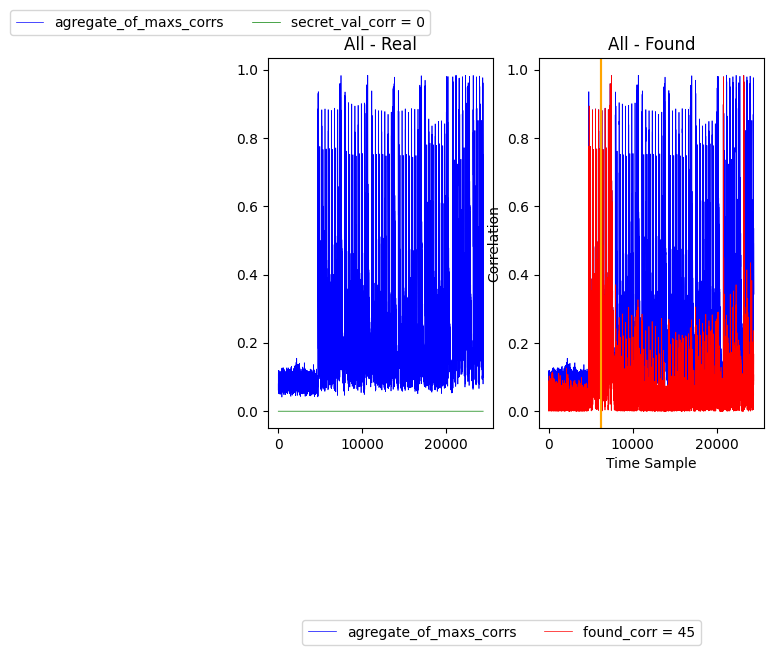

In [13]:
corr_map = abs(np.array(corr_HW8[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'HW8_{firmwareName}')

### Current Overview and findings: 